In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
df = dd.read_csv("../data/accepted_2007_to_2018Q4.csv", assume_missing = True, dtype={'desc': 'object', 'id': 'object', 'sec_app_earliest_cr_line': 'object', 'debt_settlement_flag_date': 'object',
'hardship_end_date': 'object',
'hardship_loan_status': 'object',
'hardship_reason': 'object',
'hardship_start_date': 'object',
'hardship_status': 'object',
'hardship_type': 'object',
'payment_plan_start_date': 'object',
'settlement_date': 'object',
'settlement_status': 'object'})

In [3]:
pct_missing_values = df.isna().sum(axis=0).compute()/len(df)

/Users/yancyliao/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (59) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/Users/yancyliao/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (49,59) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/Users/yancyliao/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (59) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/Users/yancyliao/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (49,59) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


In [4]:
thresh = 0.1
missing_cols = list(pct_missing_values[pct_missing_values>thresh].index)

In [5]:
all_cols = list(df.columns)

In [6]:
[x for x in all_cols if x not in missing_cols]

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'ch

In [7]:
leaky_cols = ['funded_amnt_inv', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'tot_coll_amt',
 'tot_cur_bal',
 'mths_since_recent_bc',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'num_accts_ever_120_pd',
 'tot_hi_cred_lim',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'collections_12_mths_ex_med', 'debt_settlement_flag', 'chargeoff_within_12_mths',
 'delinq_amnt', 'inq_last_6mths', 'acc_now_delinq', 'num_tl_120dpd_2m',
 'num_tl_30dpd']
unneeded_cols = ['id', 'installment', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code', 'earliest_cr_line']

In [8]:
drop_cols = missing_cols + leaky_cols + unneeded_cols

In [9]:
[x for x in all_cols if x not in drop_cols]

['loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_pymnt',
 'policy_code',
 'application_type',
 'total_rev_hi_lim',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'hardship_flag',
 'disbursement_method']

In [10]:
df = df[df.loan_status != "Current"]

In [11]:
data = df.drop(drop_cols, axis=1).compute()

/Users/yancyliao/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:151: DtypeWarning: Columns (59) have mixed types.Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, cache)
/Users/yancyliao/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:151: DtypeWarning: Columns (49,59) have mixed types.Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, cache)


In [12]:
#paid full rates change from 77.89% to 78.20%, which is not that big
data.dropna(inplace=True)

In [13]:
data = data.astype({'loan_amnt': 'float32', 'funded_amnt': 'float32', 'term': 'category', 'int_rate': 'float32', 'grade': 'category', 'emp_length': 'category', 'home_ownership': 'category', 'verification_status': 'category',\
    'loan_status': 'category', 'pymnt_plan': 'category', 'purpose': 'category', 'addr_state': 'category', 'dti': 'float32', 'delinq_2yrs': 'int32', 'initial_list_status': 'category', 'policy_code': 'category', 'mo_sin_rcnt_rev_tl_op': 'int32',\
    'mo_sin_rcnt_tl': 'int32', 'mort_acc': 'int32', 'num_sats': 'int32', 'pub_rec_bankruptcies': 'int32', 'tax_liens': 'int32', 'application_type': 'category', 'hardship_flag': 'category', 'disbursement_method': 'category',\
    'issue_d': 'datetime64[ns]', 'open_acc': 'int32', 'pub_rec': 'int32'})

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218647 entries, 0 to 14843
Data columns (total 53 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   loan_amnt                   1218647 non-null  float32       
 1   funded_amnt                 1218647 non-null  float32       
 2   term                        1218647 non-null  category      
 3   int_rate                    1218647 non-null  float32       
 4   grade                       1218647 non-null  category      
 5   emp_length                  1218647 non-null  category      
 6   home_ownership              1218647 non-null  category      
 7   annual_inc                  1218647 non-null  float64       
 8   verification_status         1218647 non-null  category      
 9   issue_d                     1218647 non-null  datetime64[ns]
 10  loan_status                 1218647 non-null  category      
 11  pymnt_plan                

In [14]:
data.sort_values(by="issue_d").tail(5).transpose()

,61804,61923,61970,55124,69008
loan_amnt,6000.0,10000.0,6025.0,7500.0,21000.0
funded_amnt,6000.0,10000.0,6025.0,7500.0,21000.0
term,36 months,60 months,36 months,36 months,36 months
int_rate,8.81,10.33,18.940001,7.56,6.46
grade,A,B,D,A,A
emp_length,1 year,10+ years,3 years,10+ years,10+ years
home_ownership,MORTGAGE,MORTGAGE,RENT,MORTGAGE,RENT
annual_inc,58000.0,61000.0,36000.0,127500.0,88450.0
verification_status,Source Verified,Source Verified,Source Verified,Not Verified,Source Verified
issue_d,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00


In [15]:
year = range(2012, 2019)
num_loans = []
percent_paidoff = []
for i in year:
    loans = (data["issue_d"].dt.year == i).sum()
    paid = (data[data["issue_d"].dt.year==i].loan_status == "Fully Paid").sum()
    num_loans.append(loans)
    percent_paidoff.append((paid/loans)*100)

temp = pd.DataFrame({"year": year, "num_loans": num_loans, "percent_paidoff": percent_paidoff})


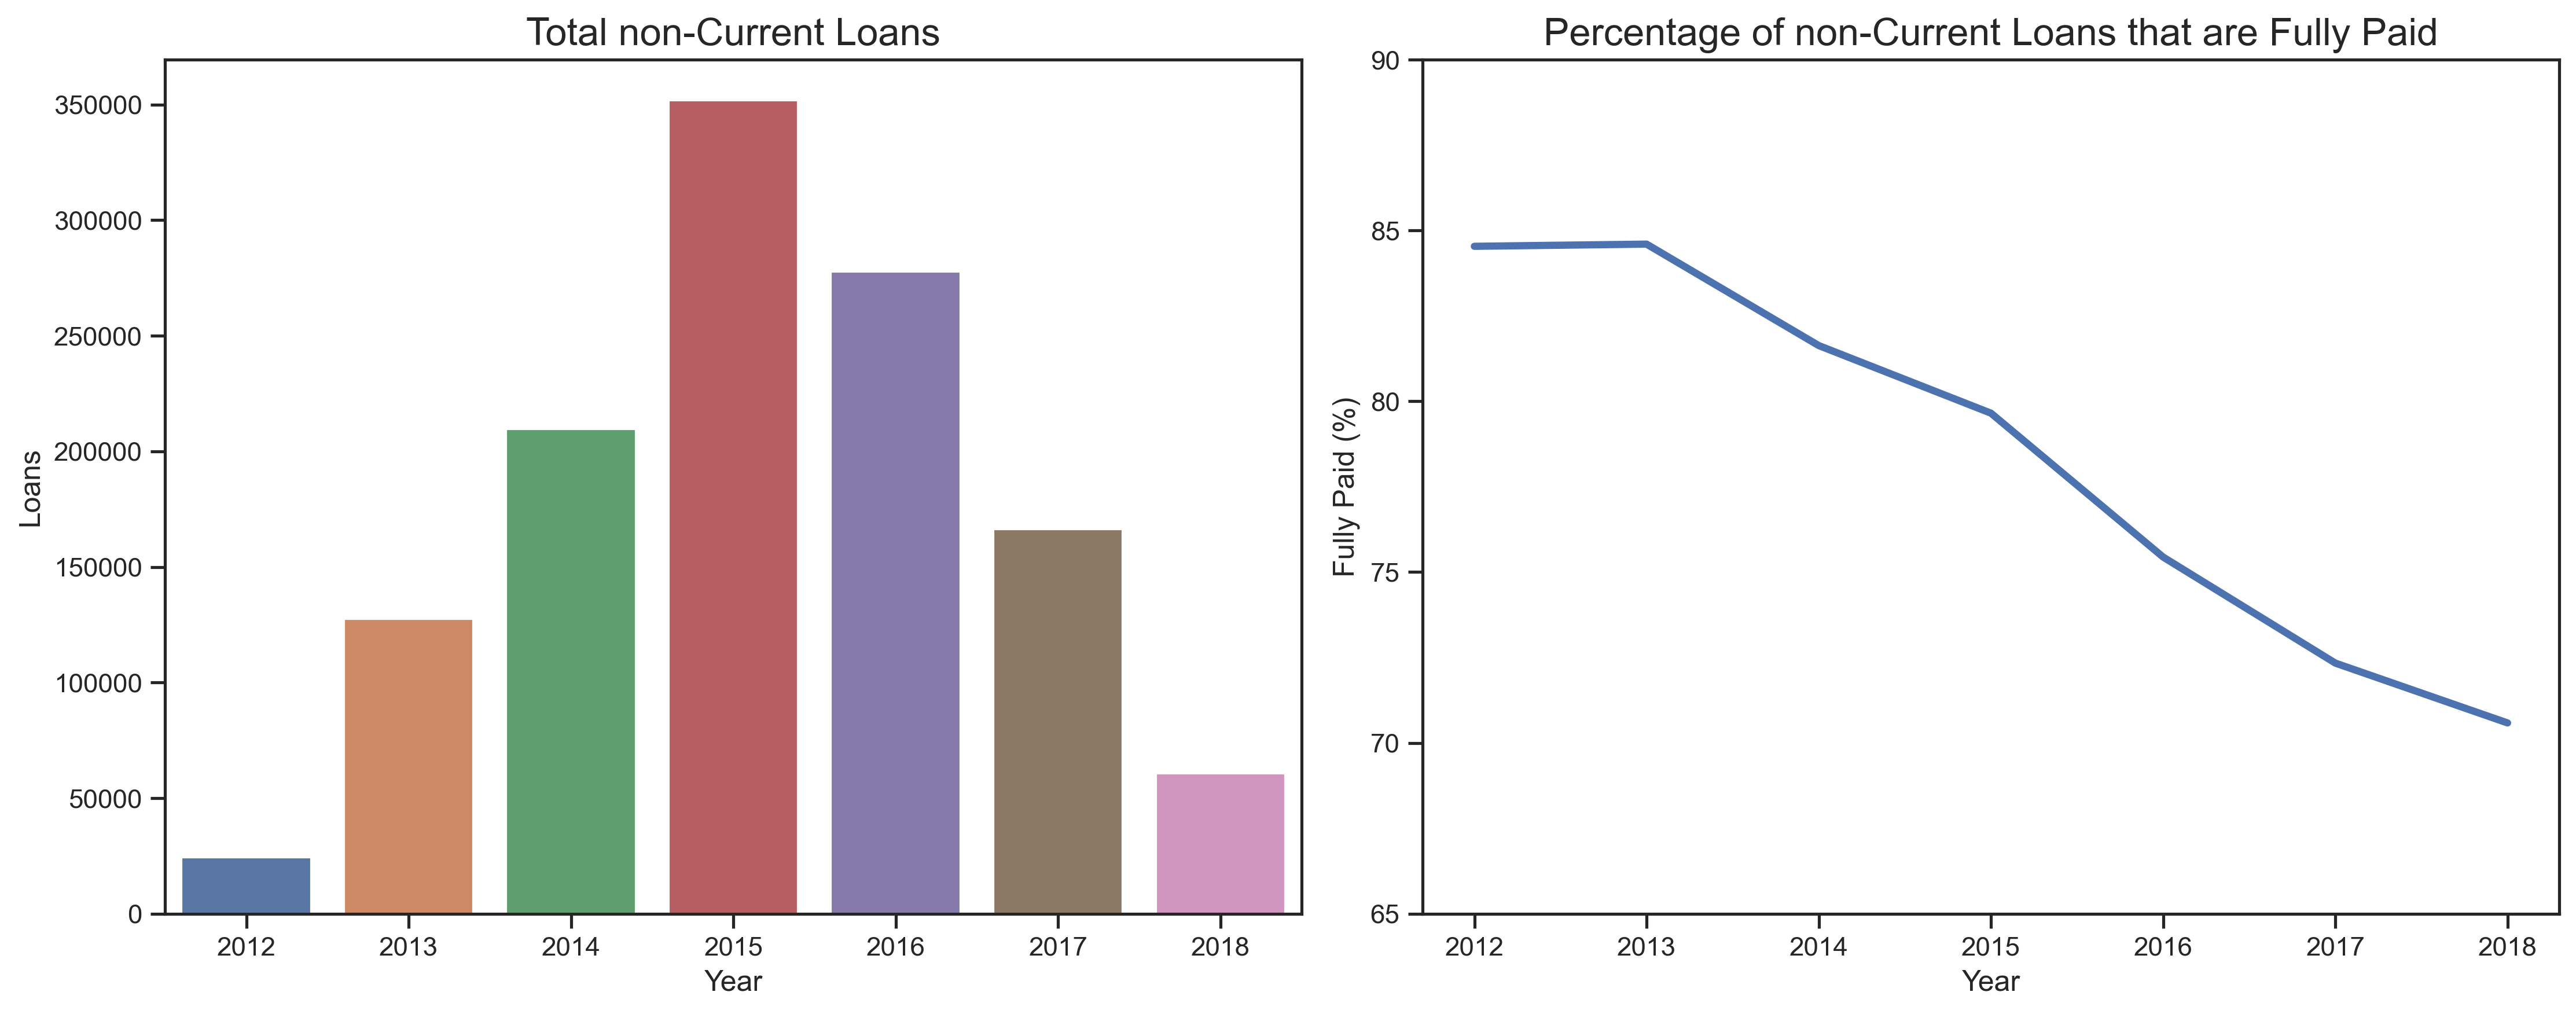

In [16]:
sns.set_theme()
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style("ticks")
sns.set_context('notebook')

fig, axs = plt.subplots(1,2, figsize=(15,6))
sns.barplot(data=temp, x="year", y="num_loans", ax = axs[0])
axs[0].set_title("Total non-Current Loans", fontsize = 16)
axs[0].set_ylabel("Loans")
axs[0].set_xlabel("Year")

sns.lineplot(data=temp, x="year", y="percent_paidoff", linewidth= 3, ax = axs[1])
axs[1].set_title("Percentage of non-Current Loans that are Fully Paid", fontsize = 16)
axs[1].set_ylabel("Fully Paid (%)")
axs[1].set_xlabel("Year")
axs[1].set(ylim=(65, 90))
plt.tight_layout()

fig.savefig("../img/test.jpg")

In [18]:
main = data[(data["issue_d"].dt.year == 2013) | (data["issue_d"].dt.year == 2012)]

In [19]:
main = main.sort_values(by="issue_d")
main = main.reset_index(drop=True)
main.shape

(152073, 53)

In [20]:
main.loan_status.value_counts()

Fully Paid            128637
Charged Off            23432
Late (31-120 days)         3
In Grace Period            1
Default                    0
Late (16-30 days)          0
Name: loan_status, dtype: int64

In [21]:
main = main[(main.loan_status == 'Fully Paid') | (main.loan_status == 'Charged Off')]
main.shape

(152069, 53)

In [22]:
for col in main.columns:
    if main[col].dtype.name=='category':
        main[col] = main[col].cat.remove_unused_categories()


In [23]:
data["emp_length"].unique()

['10+ years', '3 years', '4 years', '6 years', '7 years', ..., '2 years', '5 years', '9 years', '< 1 year', '1 year']
Length: 11
Categories (11, object): ['10+ years', '3 years', '4 years', '6 years', ..., '5 years', '9 years', '< 1 year', '1 year']

In [24]:
mapping = {"< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10+ years":10}
main["emp_length"] = main["emp_length"].map(mapping)

In [25]:
main.drop(columns=["disbursement_method", "hardship_flag"], inplace=True)

In [26]:
main.drop(columns=["pymnt_plan", "application_type", "policy_code"], inplace=True)

In [27]:
main["fico"] = (main["fico_range_low"] + main["fico_range_high"])/2

In [28]:
main.drop(columns=["fico_range_low", "fico_range_high"], inplace=True)

In [29]:
main["profitable"] = main["total_pymnt"] > main["funded_amnt"]
main["profit"] = main["total_pymnt"] - main["funded_amnt"]

In [30]:
# def plot_cont(col_name, feature_name):
#     sns.set_theme()
#     sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
#     sns.set_style("ticks")
#     sns.set_context('notebook')

#     fig, axs = plt.subplots(1,2, figsize = (15,6))
#     sns.histplot(main[col_name], ax = axs[0])
#     axs[0].set_title(feature_name + " counts", fontsize = 16)
#     axs[0].set_ylabel("Counts")
#     axs[0].set_xlabel(feature_name)

#     sns.boxplot(data=main, x=col_name, y="loan_status", width=0.3, ax=axs[1])
#     axs[1].set_title(feature_name + " boxplots by Loan Status", fontsize = 16)
#     axs[1].set_ylabel("")
#     axs[1].set_xlabel(feature_name)

#     plt.tight_layout()

In [225]:
def plot_cont(col, feature_name):
    sns.set_theme()
    sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
    sns.set_style("ticks")
    sns.set_context('notebook')

    fig, axs = plt.subplots(1,2, figsize = (15,6))
    sns.histplot(col, ax = axs[0])
    axs[0].set_title(feature_name + " histogram", fontsize = 16)
    axs[0].set_ylabel("Counts")
    axs[0].set_xlabel(feature_name)

    sns.boxplot(x=col, y=main["loan_status"], width=0.3, ax=axs[1])
    axs[1].set_title(feature_name + " by loan status", fontsize = 16)
    axs[1].set_ylabel("")
    axs[1].set_xlabel(feature_name)

    plt.tight_layout()
    fig.savefig("../img/"+feature_name+".jpg")

In [226]:
def plot_cat(col_name, feature_name, rotation_amt = 0):
    sns.set_theme()
    sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
    sns.set_style("ticks")
    sns.set_context('notebook')

    cats = np.sort(main[col_name].unique())
 
    fig, axs = plt.subplots(1,2, figsize = (15,6))
    g = sns.countplot(x=col_name, data =main, order = cats, ax = axs[0])
    axs[0].set_title(feature_name + " histogram", fontsize = 16)
    axs[0].set_ylabel("Counts")
    axs[0].set_xlabel(feature_name)
    g.set_xticklabels(labels = cats, rotation=rotation_amt)

    #rates = main.groupby(col_name)["loan_status"].value_counts(normalize=True).loc[:,"Charged Off"]
    rates = []
    for i in cats:
        temp = main[main[col_name]==i]["loan_status"].value_counts(normalize=True)
        if "Charged Off" in temp.index:
            rates.append(temp.loc["Charged Off"])
        else:
            rates.append(0)
            
    h = sns.barplot(x=cats, y=rates, ax=axs[1])
    axs[1].set_title("Charge-off rates for varying " + feature_name, fontsize = 16)
    axs[1].set_ylabel("Charge-off rate")
    axs[1].set_xlabel(feature_name)
    h.set_xticklabels(labels = cats, rotation=rotation_amt)

    plt.tight_layout()

    fig.savefig("../img/"+feature_name+".jpg")

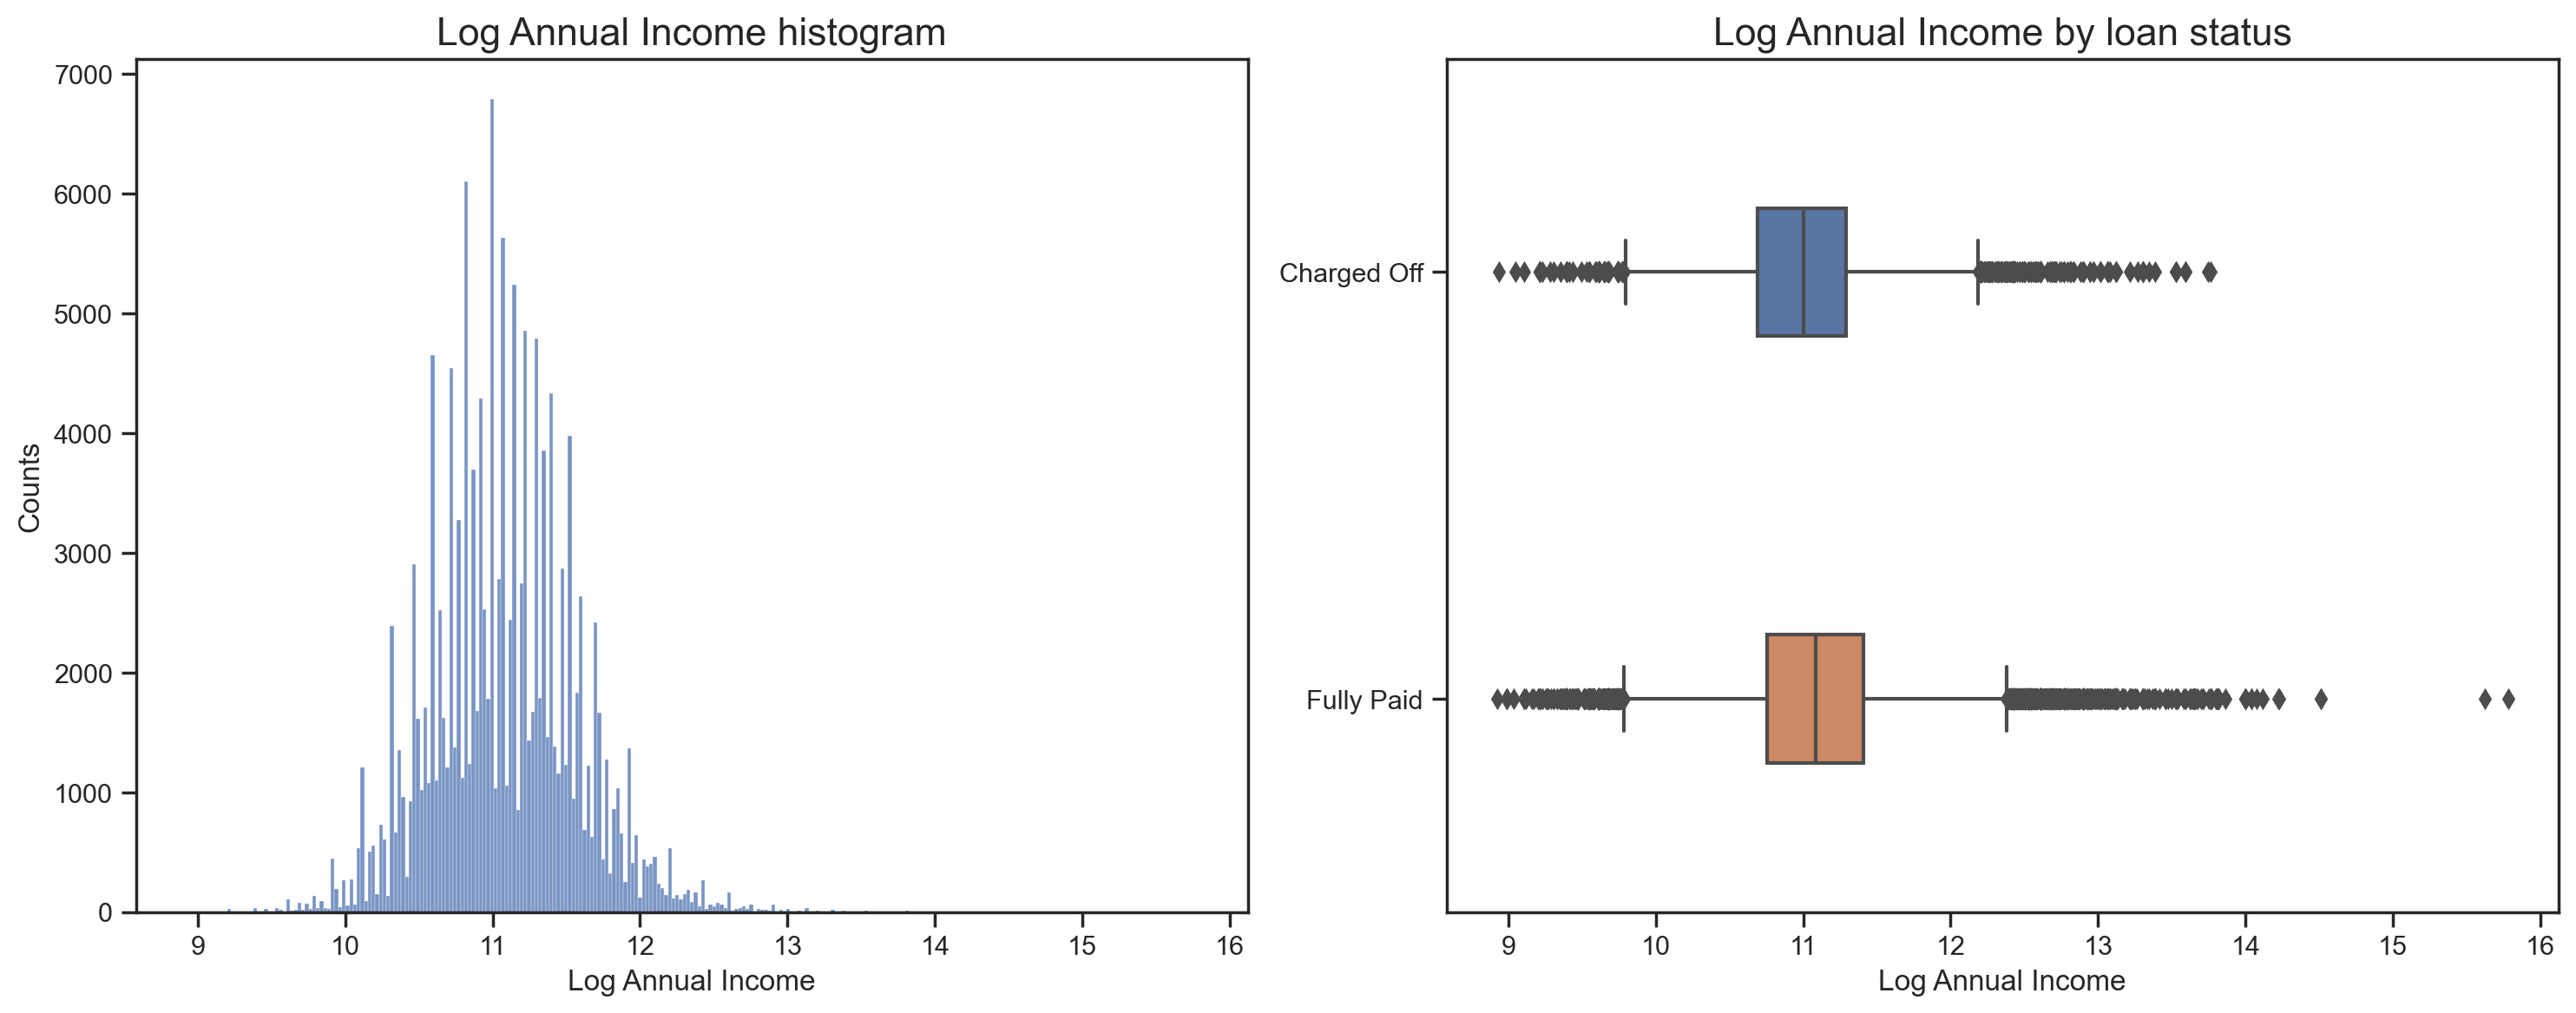

In [227]:
plot_cont(np.log(main["annual_inc"]), "Log Annual Income")

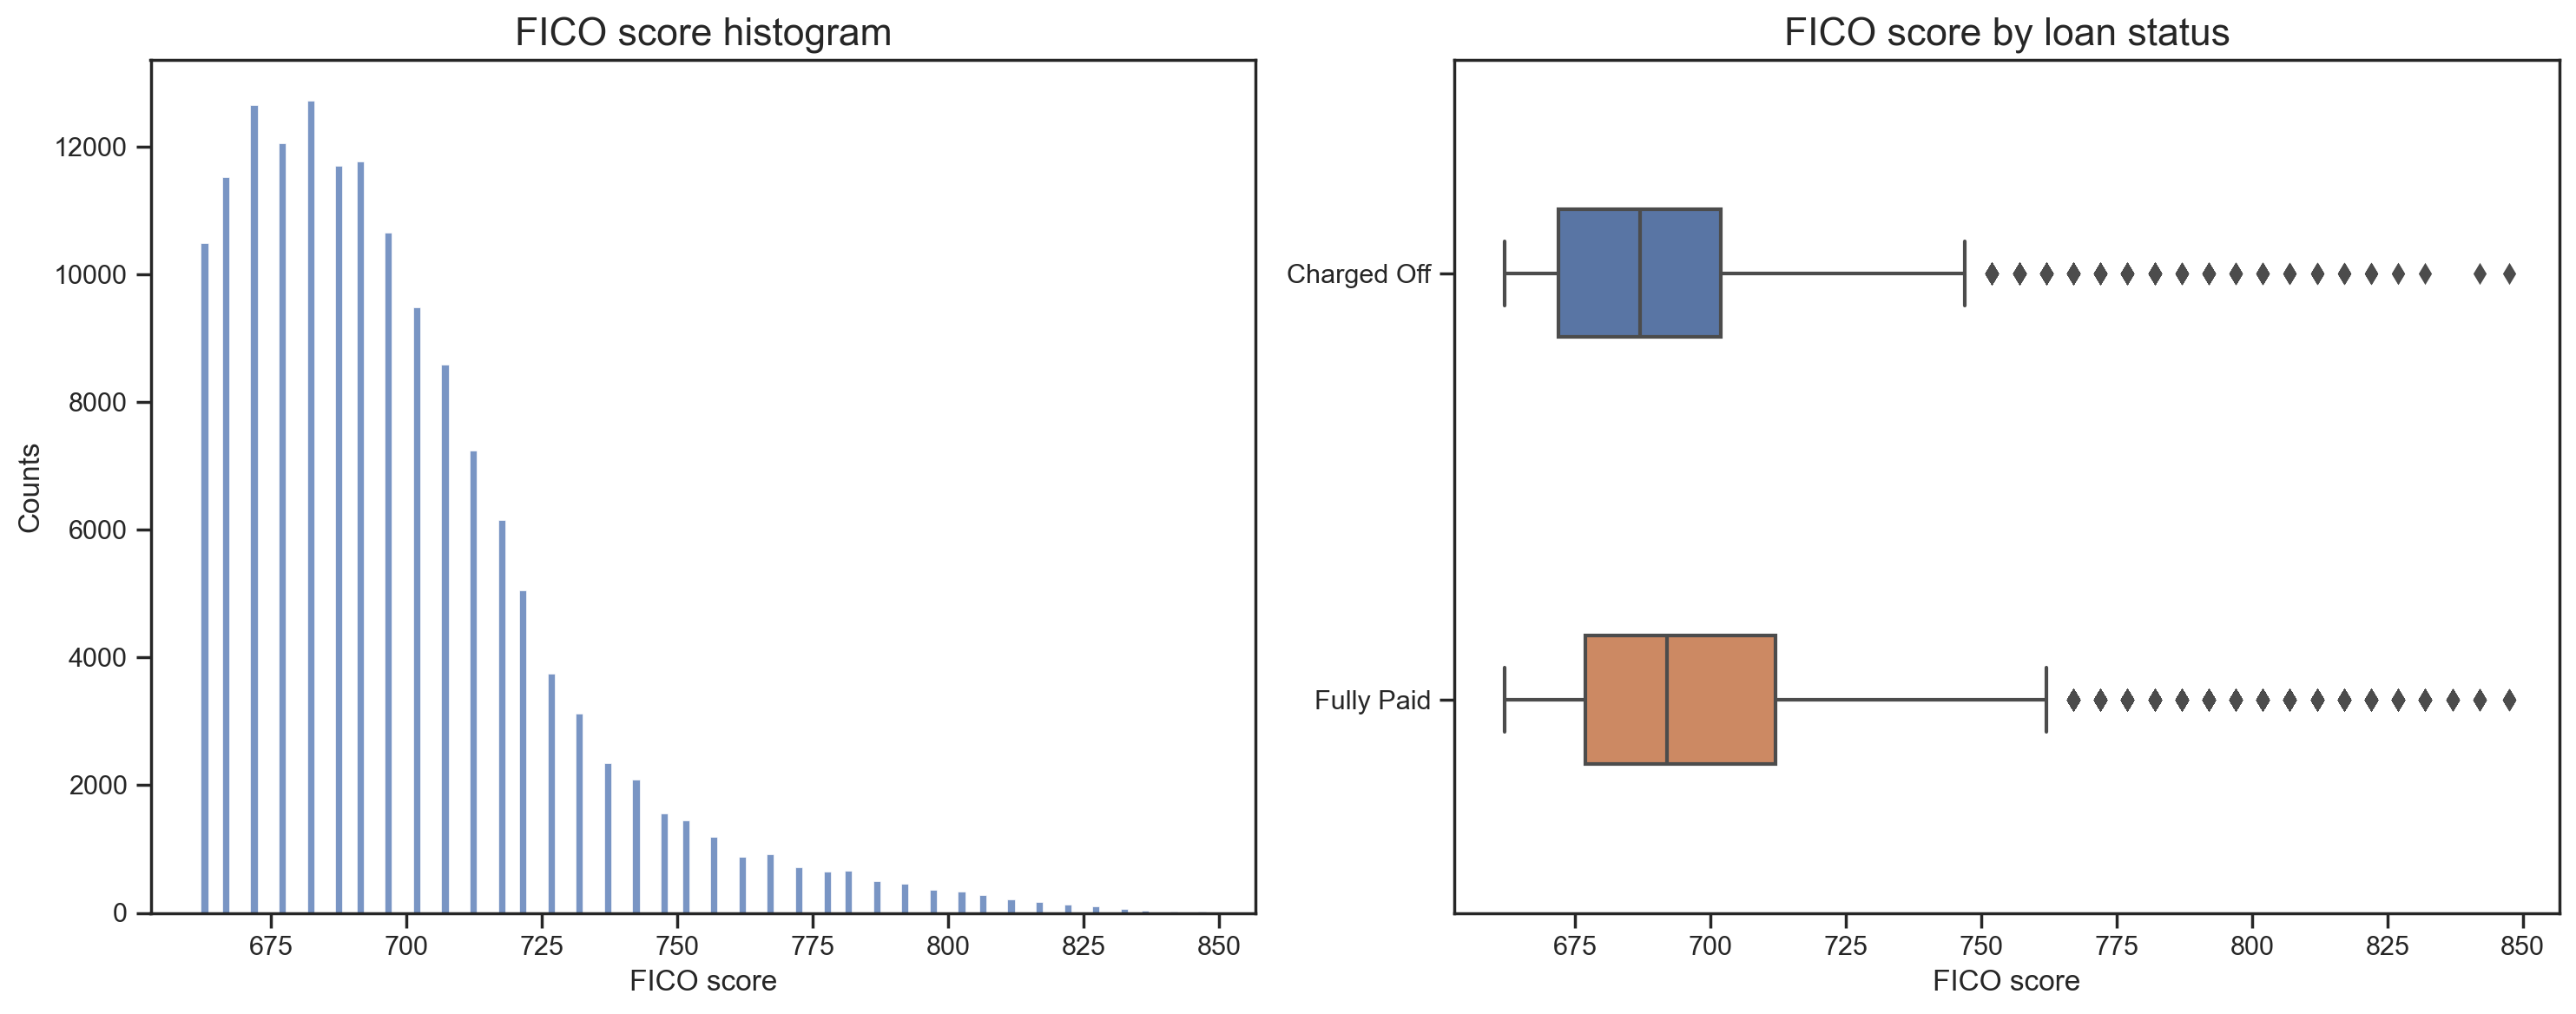

In [228]:
plot_cont(main["fico"], "FICO score")

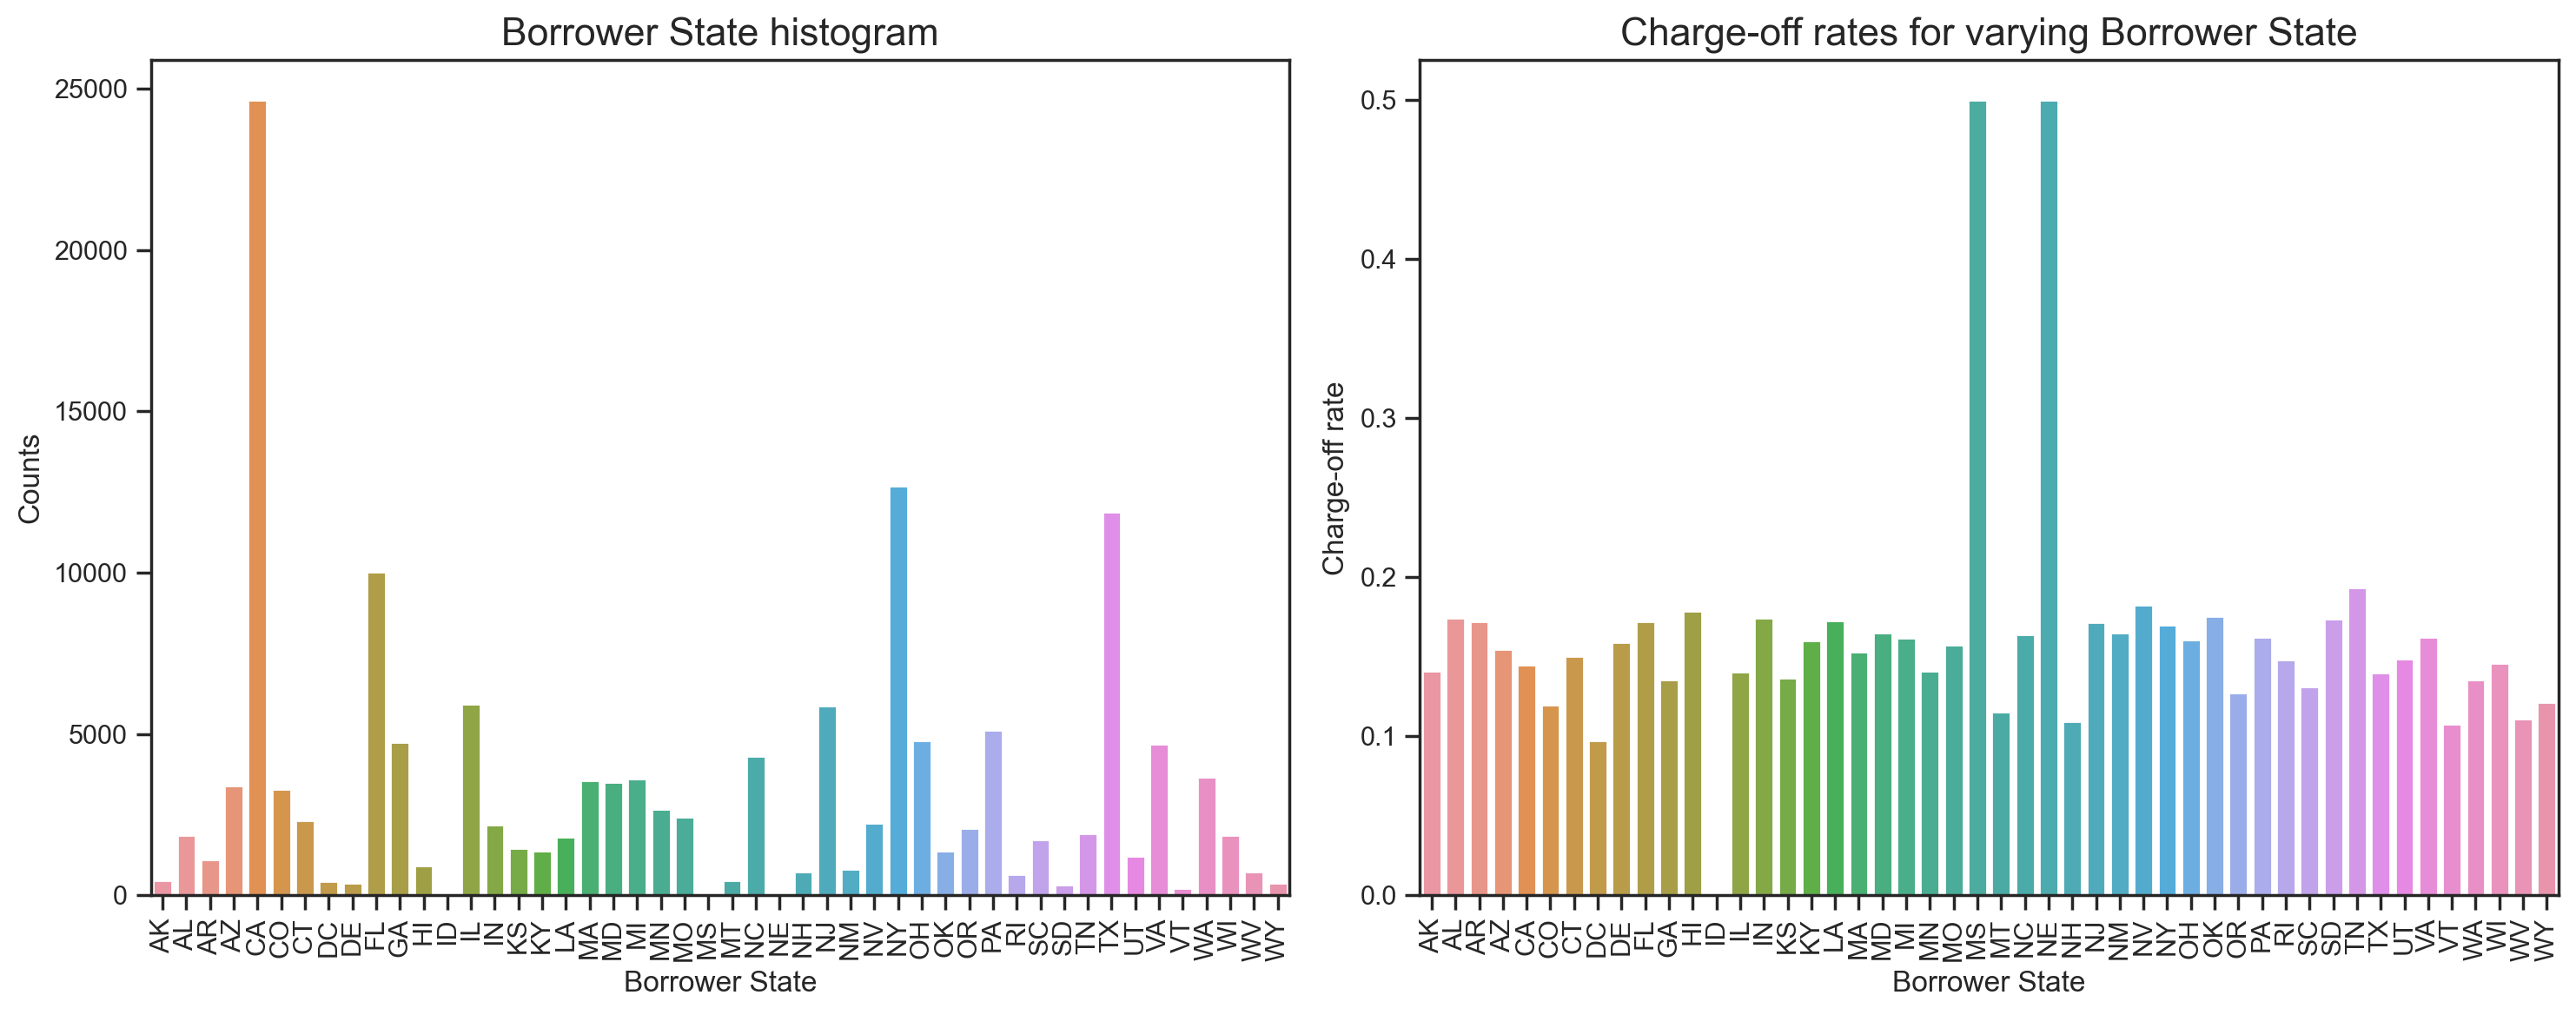

In [229]:
plot_cat("addr_state", "Borrower State", 90)

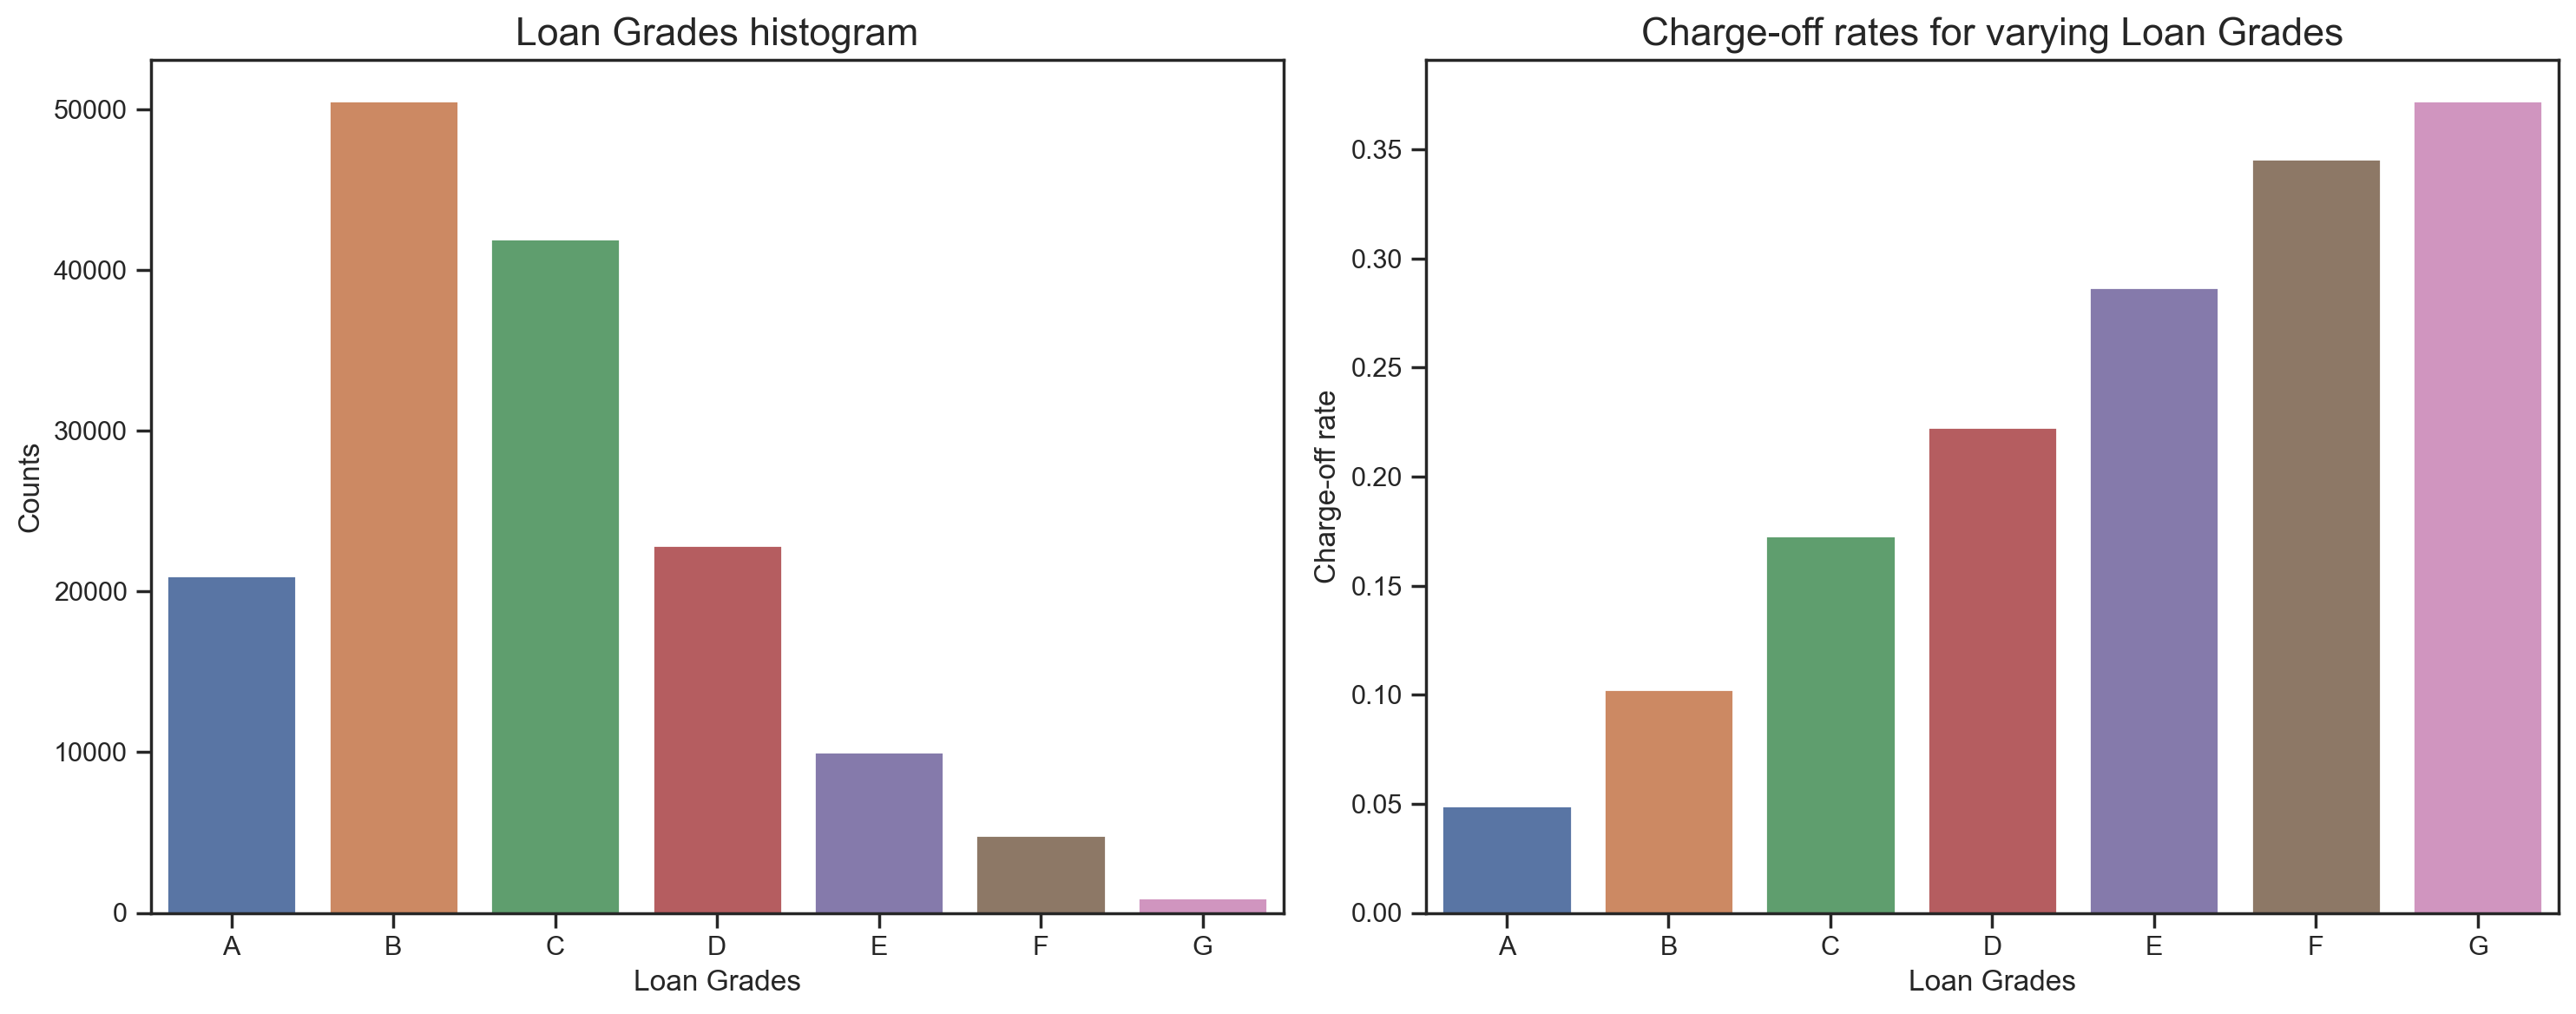

In [231]:
plot_cat("grade", "Loan Grades", 0)

In [290]:
new_df = main.copy()

In [291]:
mapping = {"A": 7, "B":6, "C":5, "D":4, "E":3, "F":2, "G": 1}
new_df["grade"] = new_df["grade"].map(mapping)

In [292]:
term_dummies = pd.get_dummies(new_df['term'], drop_first = True, prefix="term")
home_ownership_dummies = pd.get_dummies(new_df['home_ownership'], drop_first = True, prefix="home_ownership")
verification_status_dummies = pd.get_dummies(new_df['verification_status'], drop_first = True, prefix="verification_status")
purpose_dummies = pd.get_dummies(new_df['purpose'], drop_first = True, prefix="purpose")
addr_state_dummies = pd.get_dummies(new_df['addr_state'], drop_first = True, prefix="addr_state")
initial_list_status_dummies = pd.get_dummies(new_df['initial_list_status'], drop_first = True, prefix="initial_list_status")

new_df = pd.concat([new_df, term_dummies, home_ownership_dummies, verification_status_dummies, purpose_dummies, addr_state_dummies, initial_list_status_dummies], axis=1)

In [293]:
new_df = new_df.drop(['term', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status'], axis=1)

In [294]:
mapping = {"Charged Off": 1, "Fully Paid": 0}
y = new_df["loan_status"].map(mapping).astype("float32")
X = new_df.drop(['loan_status', 'funded_amnt', 'issue_d', 'profitable', 'profit', 'total_pymnt'], axis=1)
#X = new_df.drop(['loan_status', 'funded_amnt', 'issue_d', 'profitable', 'profit'], axis=1)

In [295]:
for i in X.columns:
    if X[i].dtype.name=="category":
        X[i] = X[i].astype("float32")

In [45]:
pd.set_option("display.max_rows", 200, "display.max_columns", 200)
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152069 entries, 0 to 152072
Data columns (total 104 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    loan_amnt                            float32
 1    int_rate                             float32
 2    grade                                float32
 3    emp_length                           float32
 4    annual_inc                           float64
 5    dti                                  float32
 6    delinq_2yrs                          int32  
 7    open_acc                             int32  
 8    pub_rec                              int32  
 9    revol_bal                            float64
 10   revol_util                           float64
 11   total_acc                            float64
 12   total_rev_hi_lim                     float64
 13   bc_open_to_buy                       float64
 14   bc_util                              float64
 15   mo_sin_rcnt_rev

In [46]:
#X = X.drop(columns=["grade", "int_rate"])

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [194]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, max_depth = 20, n_estimators = 10)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=0)

In [195]:
y_predict = clf.predict(X_test)

In [196]:
y_predict2 = clf.predict(X_train)

In [197]:
y_predict.mean()

0.013677731

In [198]:
y_predict2.mean()

0.071038395

In [201]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(precision_score(y_predict2, y_train))
print(recall_score(y_predict2, y_train))
print(accuracy_score(y_predict2,y_train))

0.4587546869673901
0.9966674895087633
0.9162304583037413


In [202]:
from sklearn.metrics import precision_score

print(precision_score(y_predict, y_test))
print(recall_score(y_predict, y_test))
print(accuracy_score(y_predict,y_test))

0.029845626072041165
0.3346153846153846
0.8421274133305277


In [205]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict, y_test)

array([[31842,  5656],
       [  346,   174]])

In [206]:
y_test.mean()

0.15334842

In [208]:
y_predict.sum()

520.0

In [207]:
y_test.sum()

5830.0

In [209]:
scores = clf.predict_proba(X_test)
scores[:,1]
roc_auc_score(y_test, scores[:,1])

0.6358979465835473

<BarContainer object of 104 artists>

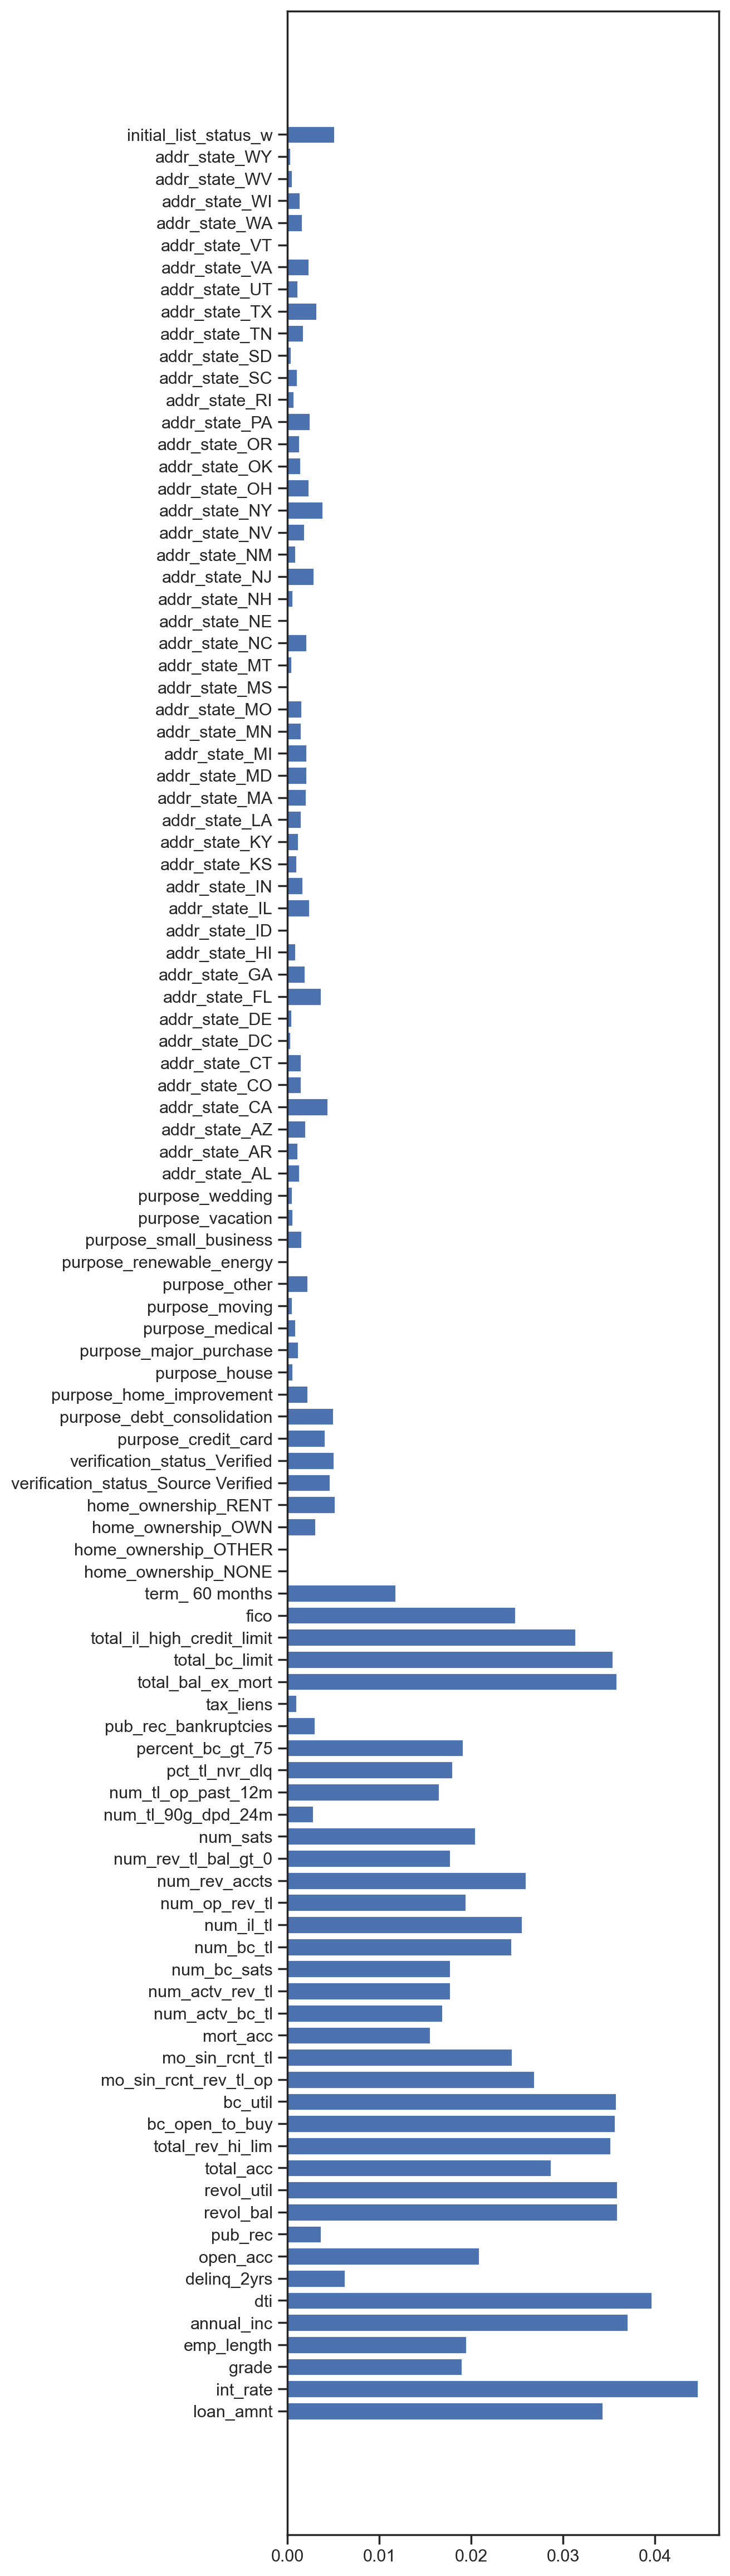

In [323]:
fig, ax = plt.subplots(figsize=(5, 30))
plt.barh(X_train.columns, clf.feature_importances_)

In [482]:
clf.feature_importances_

array([3.83781082e-02, 2.01953025e-02, 3.93879336e-02, 4.27360148e-02,
       6.73325967e-03, 2.18767152e-02, 3.66688081e-03, 3.74692174e-02,
       3.78845534e-02, 2.98467660e-02, 3.69618598e-02, 3.88950732e-02,
       3.84386137e-02, 2.84864964e-02, 2.60860756e-02, 1.57085563e-02,
       1.78641165e-02, 1.87151838e-02, 1.84319015e-02, 2.54983943e-02,
       2.65732580e-02, 2.11308984e-02, 2.71977309e-02, 1.88661940e-02,
       2.15707174e-02, 3.00242482e-03, 1.84934331e-02, 1.82491484e-02,
       1.99839697e-02, 3.00455001e-03, 8.91252282e-04, 3.71002395e-02,
       3.84165872e-02, 3.26347129e-02, 2.79539862e-02, 1.90169808e-02,
       1.12655953e-04, 1.99972017e-04, 3.36164831e-03, 5.81699326e-03,
       4.05209850e-03, 5.21895729e-03, 4.41078023e-03, 5.27518517e-03,
       2.42312307e-03, 6.68305187e-04, 1.20272793e-03, 1.15782708e-03,
       6.52681042e-04, 3.36031361e-03, 1.89382508e-04, 2.54350556e-03,
       7.98199939e-04, 1.09165230e-03, 1.56610581e-03, 1.18383362e-03,
      

In [483]:
clf.feature_importances_[10]

0.0369618597934429

In [486]:
np.argwhere(X_mini.columns=="fico")

array([[34]])

In [487]:
X_mini.columns[34]

'fico'

In [488]:
X_mini.shape

(100000, 102)

In [489]:
X_mini["fico"].corr(y_mini)

0.10956899125627909

In [69]:
profit_pct = main["profit"]/main["funded_amnt"]

NameError: name 'feature_name' is not defined

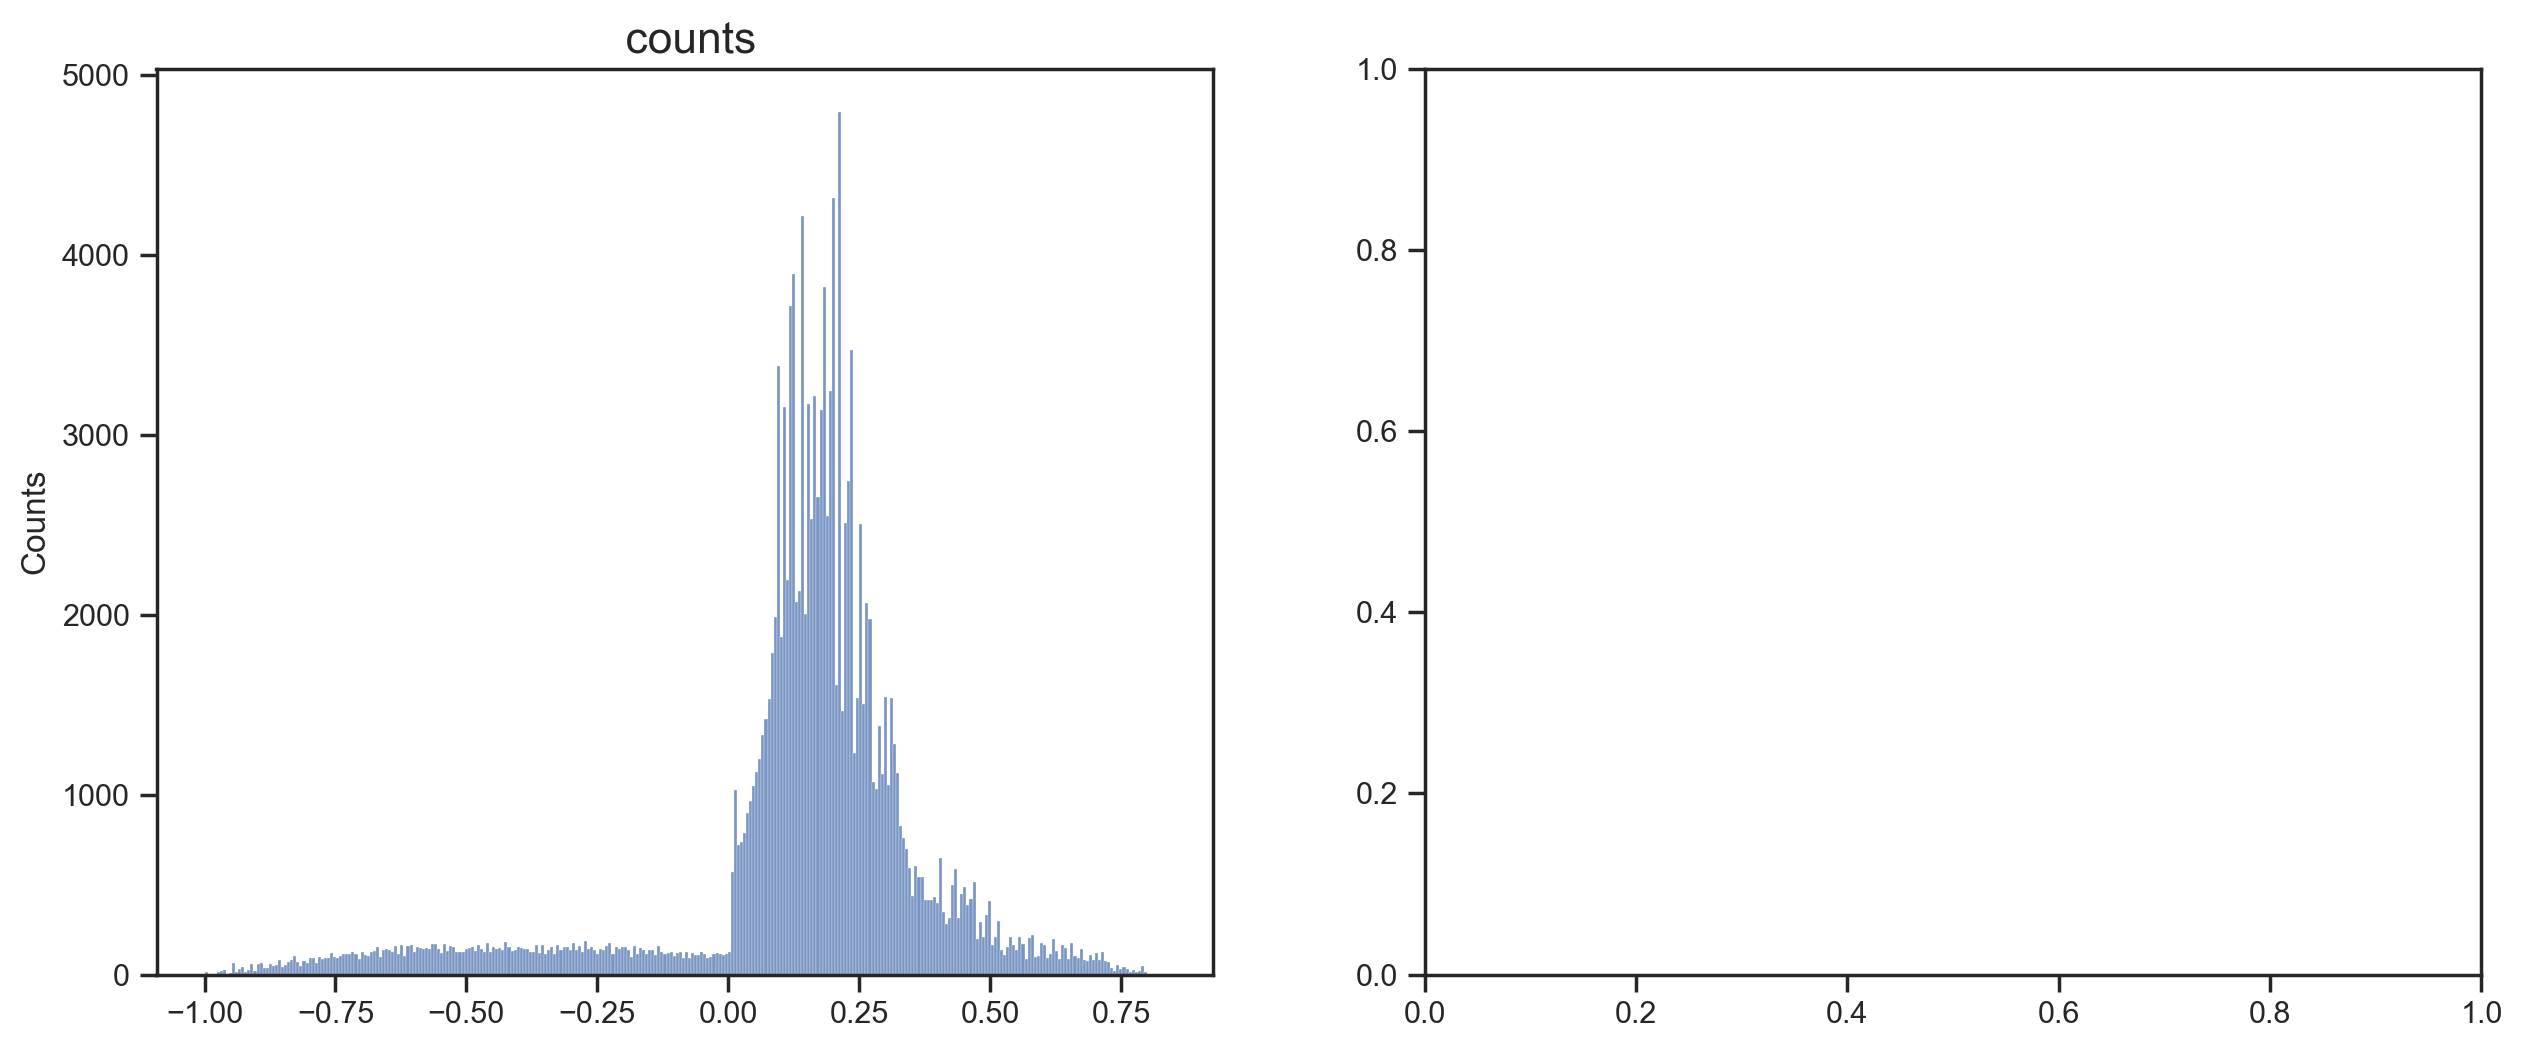

In [70]:
sns.set_theme()
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_style("ticks")
sns.set_context('notebook')

fig, axs = plt.subplots(1,2, figsize = (15,6))
sns.histplot(profit_pct, ax = axs[0])
axs[0].set_title(" counts", fontsize = 16)
axs[0].set_ylabel("Counts")
axs[0].set_xlabel(feature_name)

Text(0.5, 0, '')

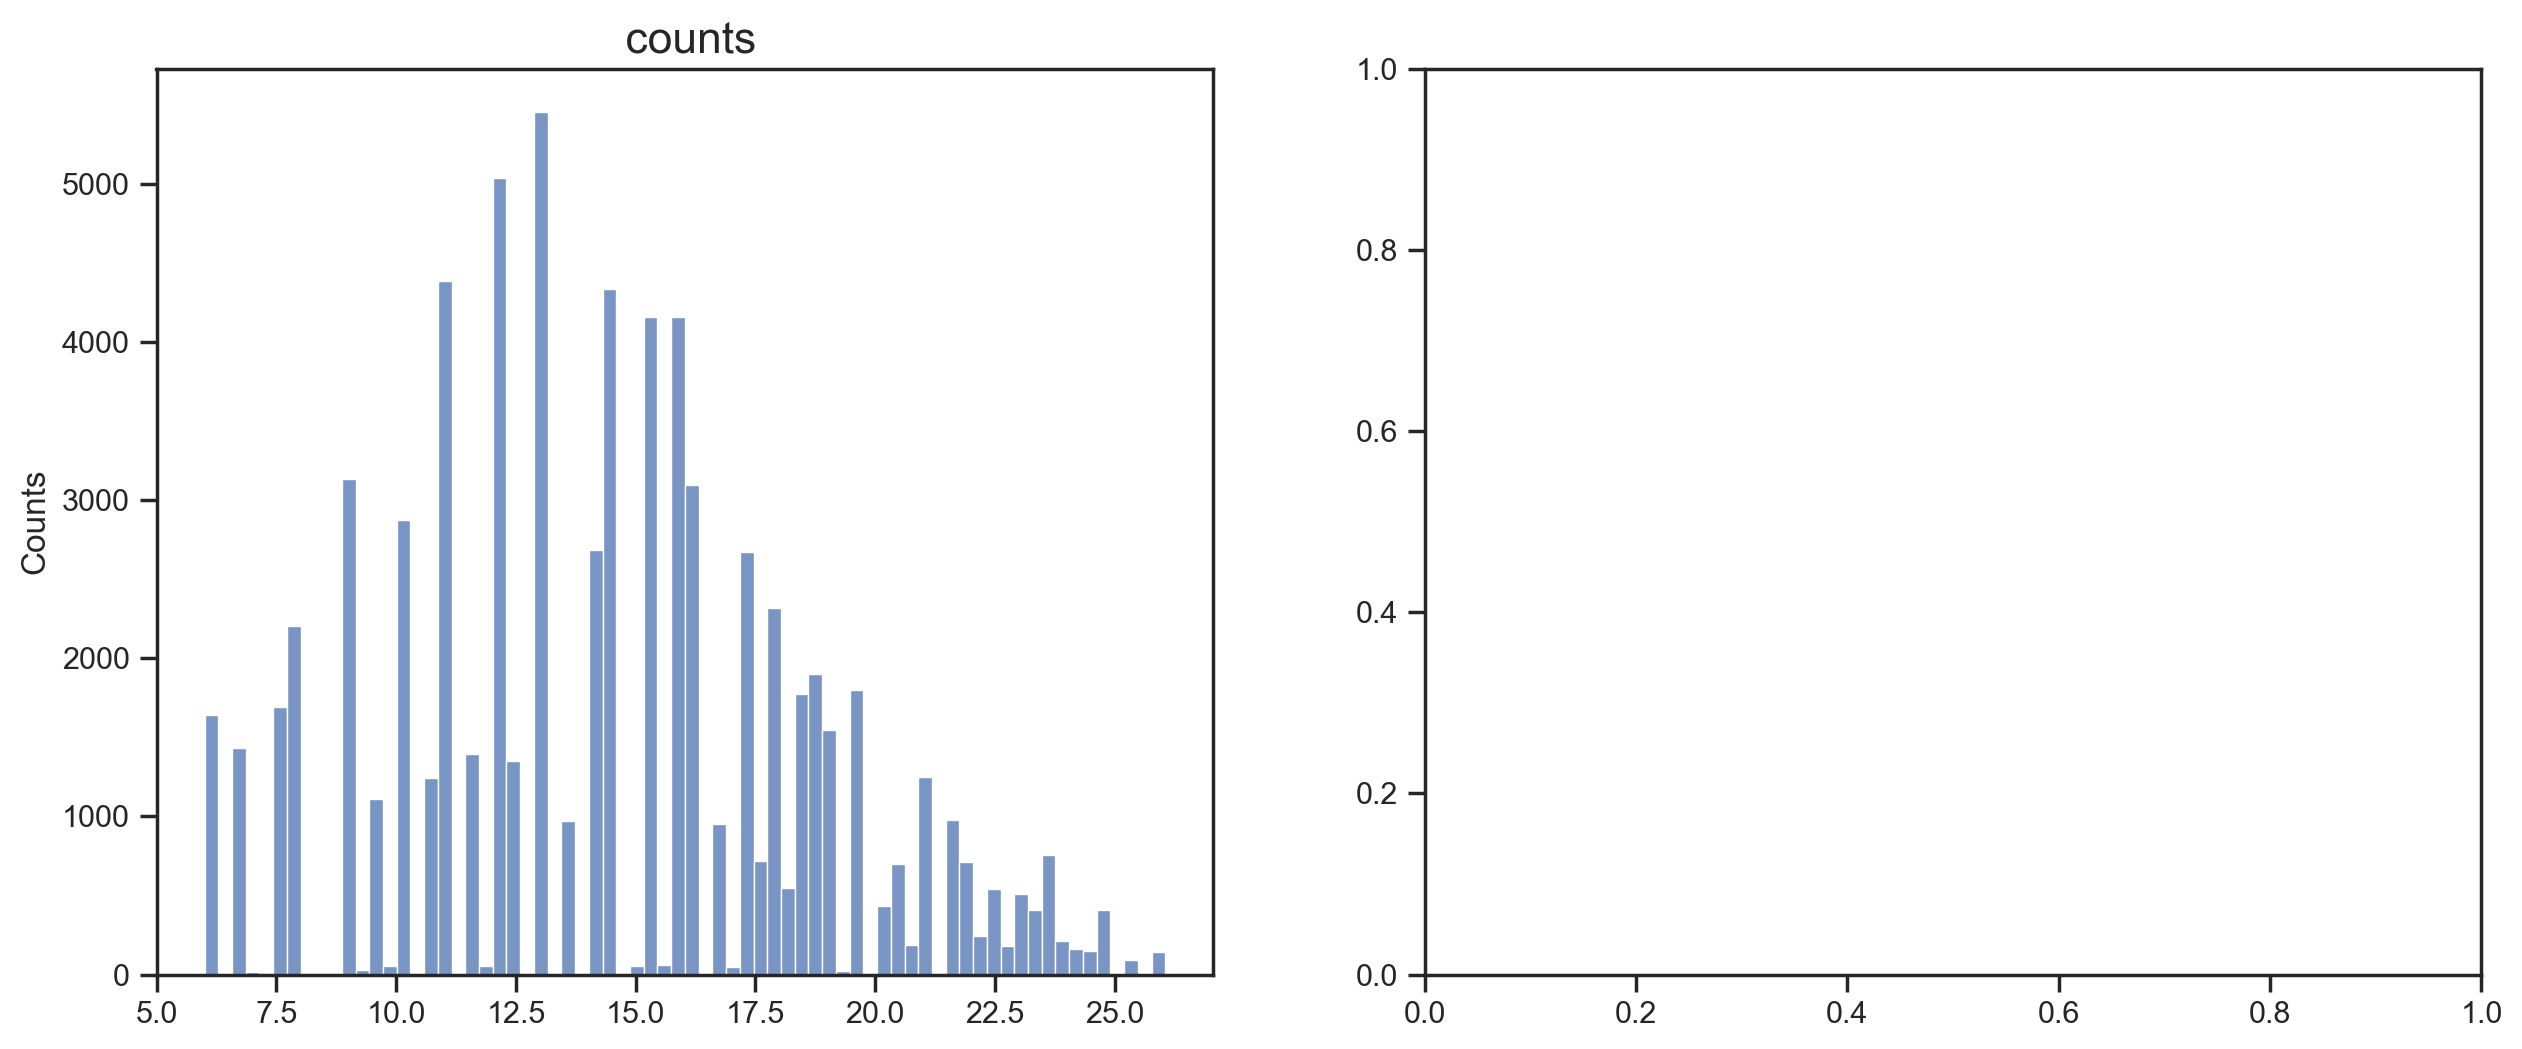

In [113]:
sns.set_theme()
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_style("ticks")
sns.set_context('notebook')

fig, axs = plt.subplots(1,2, figsize = (15,6))
sns.histplot(X_train["int_rate"], ax = axs[0])
axs[0].set_title(" counts", fontsize = 16)
axs[0].set_ylabel("Counts")
axs[0].set_xlabel("")

In [211]:
import xgboost as xgb


In [212]:
xg_class = xgb.XGBClassifier(max_depth=5, base_score=0.5, n_estimators =10, use_label_encoder=False)

In [213]:
xg_class.fit(X_train, y_train)

[02:10:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [214]:
y_pred = xg_class.predict(X_test)

In [215]:
y_pred.sum()

4

In [218]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss
scores = xg_class.predict_proba(X_test)
roc_auc_score(y_test, scores[:,1])
brier_score_loss(y_test, scores[:,1])

0.12205408278315008

In [230]:
precision_score(y_test, y_pred)

0.36904761904761907

In [217]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.0006856359273225916

In [255]:
len(y_pred)

25000

In [256]:
mapping = {0: "Fully Paid", 1: "Charged Off"}
test_y = y_train.map(mapping)
test_y

60183    Charged Off
57216     Fully Paid
86973     Fully Paid
63500     Fully Paid
72520     Fully Paid
            ...     
76436     Fully Paid
9057      Fully Paid
23865     Fully Paid
21139     Fully Paid
77477     Fully Paid
Name: loan_status_Fully Paid, Length: 75000, dtype: object

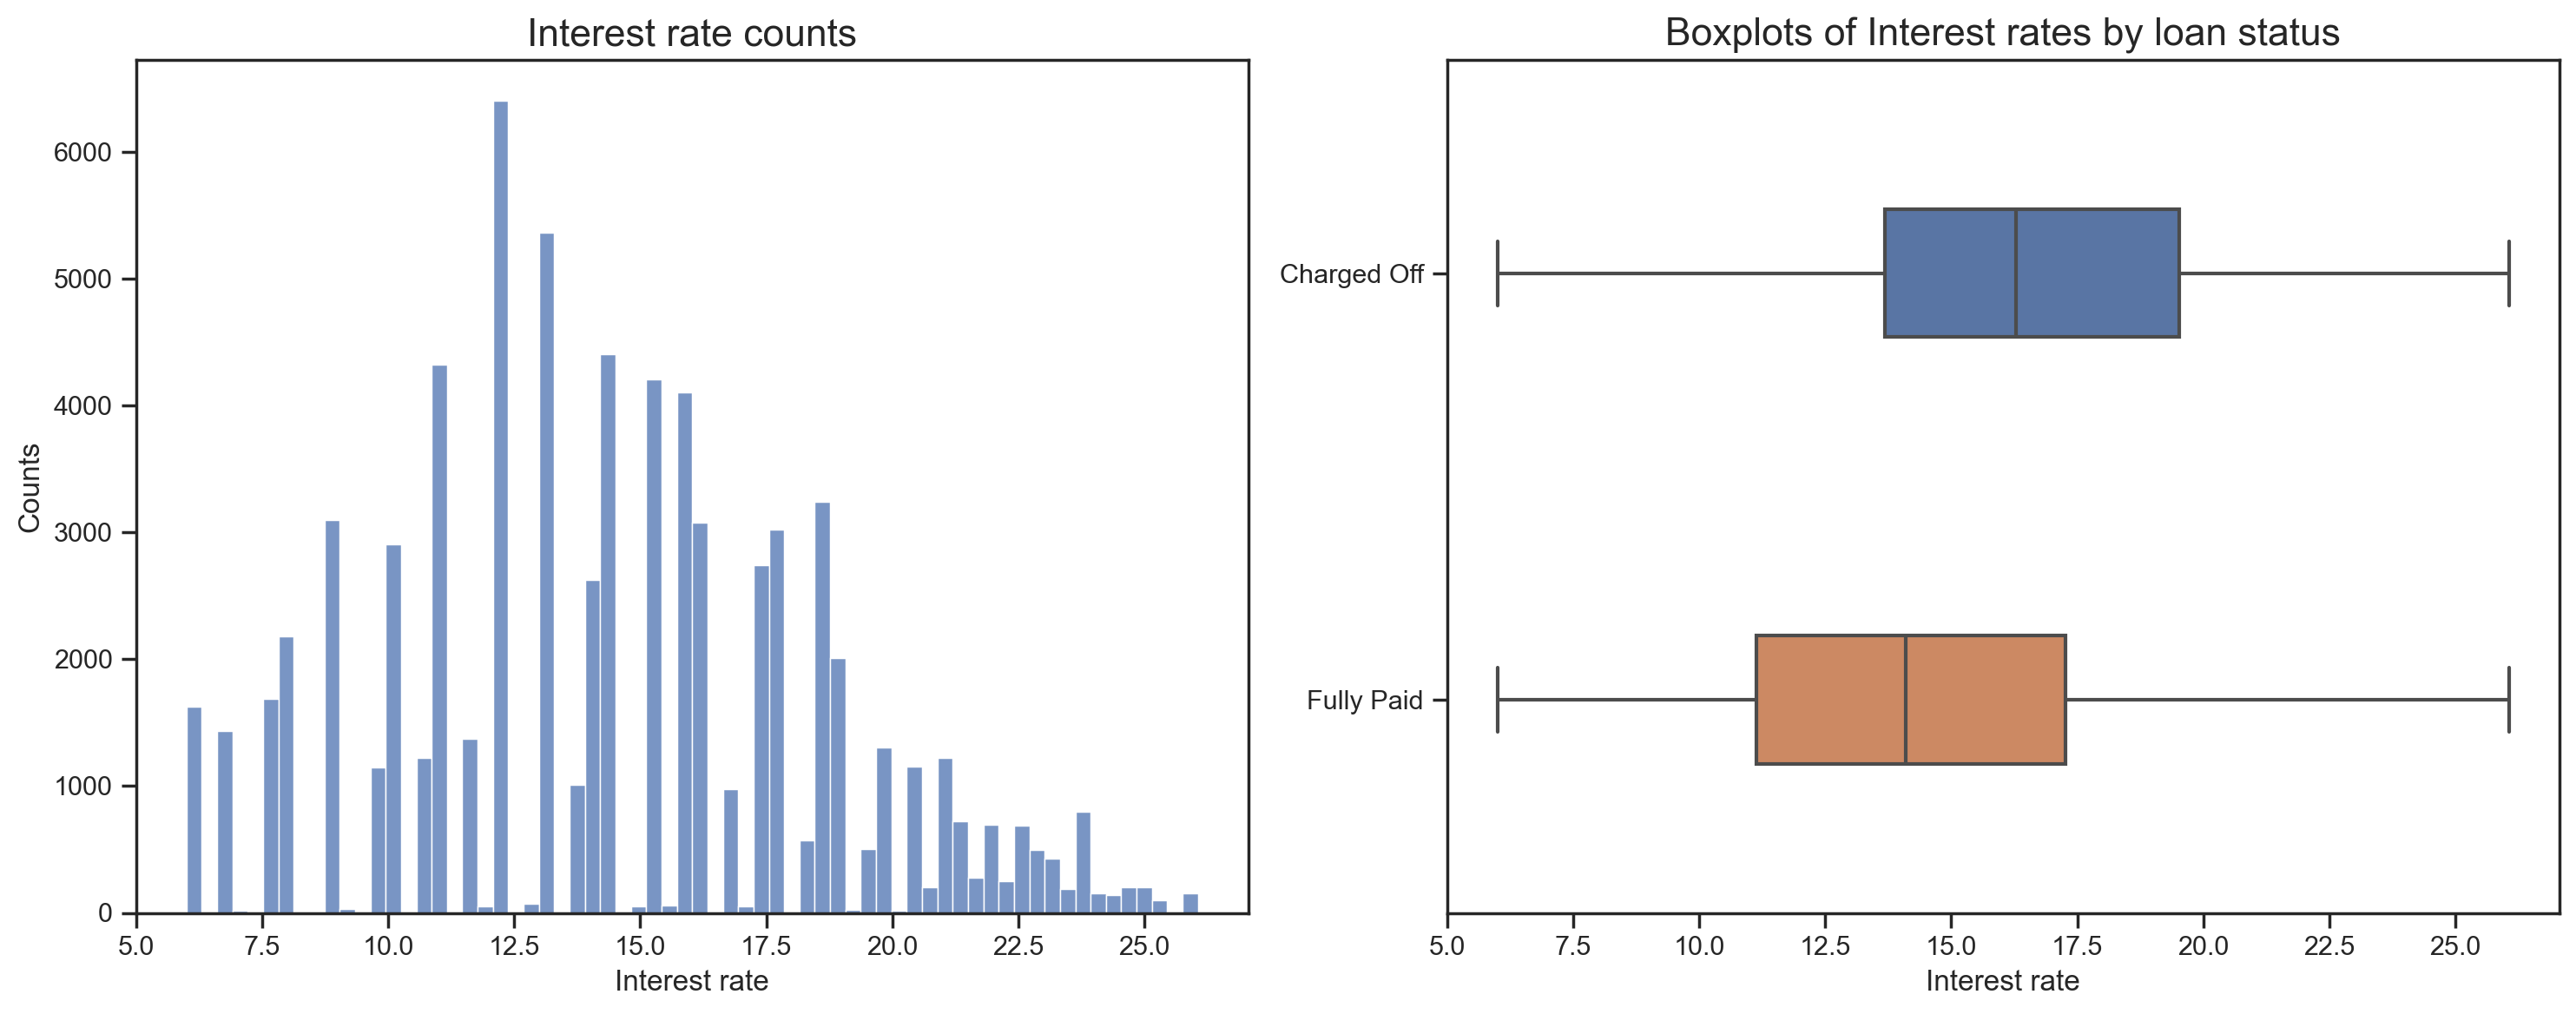

In [257]:
sns.set_theme()
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_style("ticks")
sns.set_context('notebook')

fig, axs = plt.subplots(1,2, figsize = (15,6))
sns.histplot(X_train["int_rate"], ax = axs[0])
axs[0].set_title("Interest rate" + " counts", fontsize = 16)
axs[0].set_ylabel("Counts")
axs[0].set_xlabel("Interest rate")

sns.boxplot(x=X_train["int_rate"], y=test_y, width=0.3, ax=axs[1])
axs[1].set_title("Boxplots of " + "Interest rates" + " by loan status", fontsize = 16)
axs[1].set_ylabel("")
axs[1].set_xlabel("Interest rate")

plt.tight_layout()

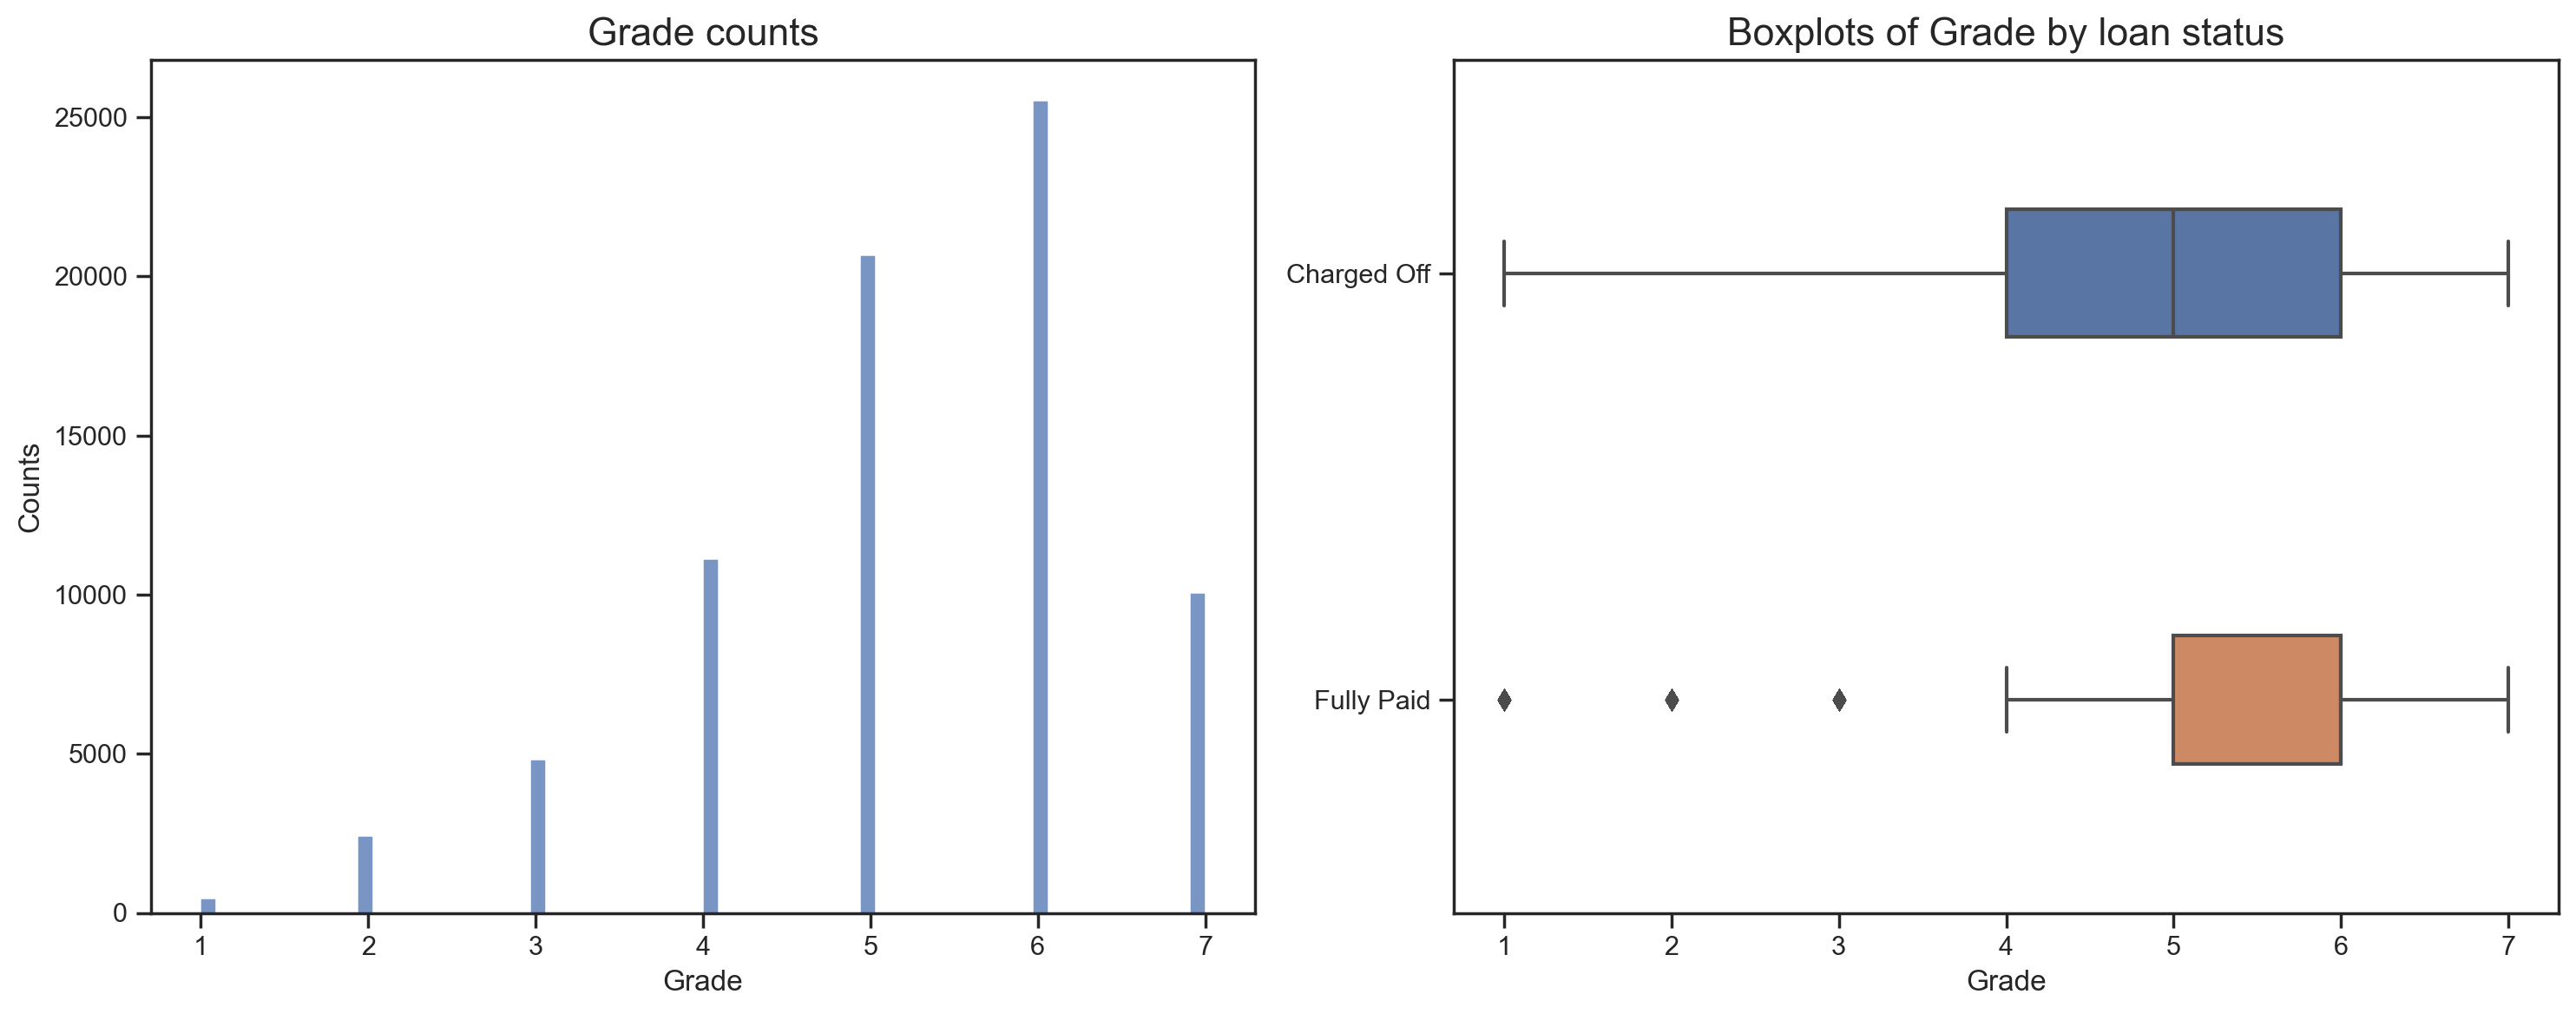

In [259]:
sns.set_theme()
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_style("ticks")
sns.set_context('notebook')

fig, axs = plt.subplots(1,2, figsize = (15,6))
sns.histplot(X_train["grade"], ax = axs[0])
axs[0].set_title("Grade" + " counts", fontsize = 16)
axs[0].set_ylabel("Counts")
axs[0].set_xlabel("Grade")

sns.boxplot(x=X_train["grade"], y=test_y, width=0.3, ax=axs[1])
axs[1].set_title("Boxplots of " + "Grade" + " by loan status", fontsize = 16)
axs[1].set_ylabel("")
axs[1].set_xlabel("Grade")

plt.tight_layout()

In [262]:
xg_class.feature_importances_

array([0.00797872, 0.0186517 , 0.00724055, 0.00723222, 0.00818426,
       0.00769445, 0.00918803, 0.00816451, 0.01138964, 0.00777007,
       0.00769226, 0.00792434, 0.00768518, 0.00765651, 0.0075352 ,
       0.00784067, 0.00761353, 0.00788099, 0.00819177, 0.00849182,
       0.00795429, 0.0075024 , 0.00774211, 0.00794402, 0.0075235 ,
       0.00633395, 0.0055319 , 0.01065782, 0.00883558, 0.00768386,
       0.00717991, 0.00845892, 0.00668424, 0.00759424, 0.00779046,
       0.00750642, 0.00773107, 0.01944201, 0.        , 0.        ,
       0.00920899, 0.00726751, 0.00927207, 0.00652092, 0.00940997,
       0.00727897, 0.01288908, 0.00729575, 0.01368305, 0.01527565,
       0.01072085, 0.01267926, 0.00247647, 0.01535491, 0.01045585,
       0.01124803, 0.01157441, 0.00968592, 0.01262097, 0.00901183,
       0.00946747, 0.0128047 , 0.00234951, 0.01963165, 0.01121878,
       0.00951722, 0.02071133, 0.        , 0.01082813, 0.01330155,
       0.01364946, 0.01393504, 0.01311955, 0.0111538 , 0.01189

In [383]:
from imblearn.oversampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [384]:
pip install imblearn

     |████████████████████████████████| 206 kB 2.7 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.over_sampling import SMOTE

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
oversample=SMOTE()
X_train, y_train = oversample.fit_resample(X= X_train, y=y_train)

In [234]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, max_depth = 10, n_estimators = 20)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=0)

In [235]:
y_predict = clf.predict(X_test)
y_predict2 = clf.predict(X_train)

In [95]:
y_predict.mean()

0.16447473

In [96]:
y_predict2.mean()

0.48654756

In [102]:
from sklearn.metrics import precision_score
accuracy_score(y_predict2, y_train)

0.8436385871818257

In [236]:
from sklearn.metrics import roc_auc_score
scores = clf.predict_proba(X_test)
roc_auc_score(y_test, scores[:,1])

0.6856958134680877

In [237]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_test, scores[:,1])
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.27702020691466445


In [240]:
y_test.shape[0]

38018

In [242]:
synthetic = np.random.uniform(0,1,y_test.shape[0])
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_test, synthetic)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.15180269707195965


In [258]:
synthetic2 = np.zeros(y_test.shape[0])
precision, recall, thresholds = precision_recall_curve(y_test, synthetic2)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.5766742069546005


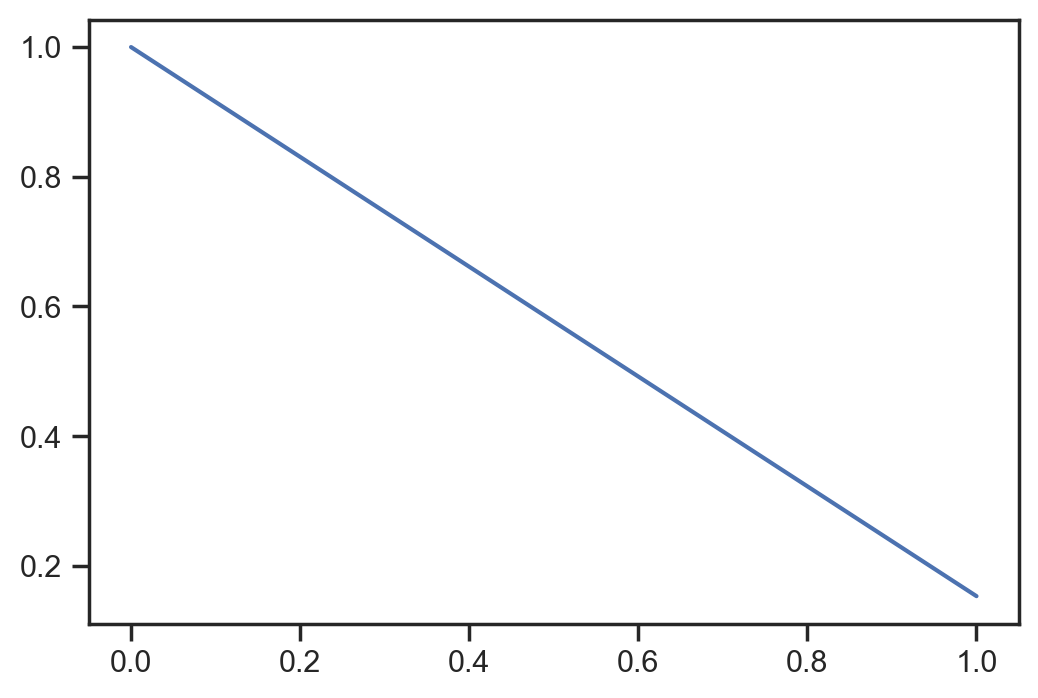

In [259]:
plt.plot(recall, precision)
plt.show()

In [260]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, synthetic2)

0.1533484139092009

In [248]:
((y_test - synthetic)**2).mean()

0.33357246232234683

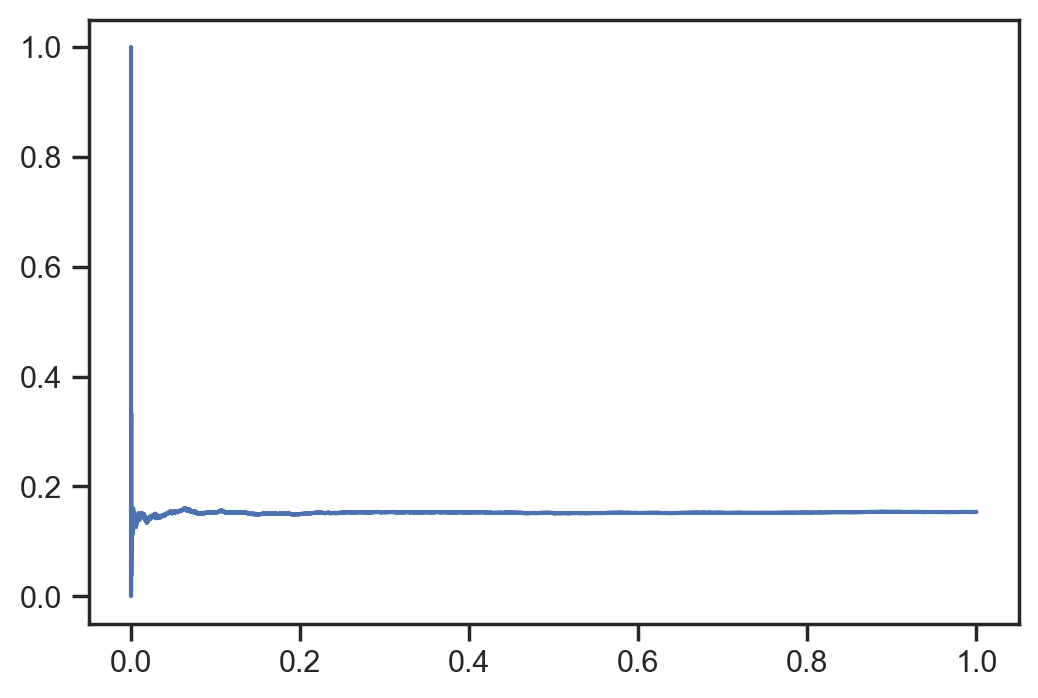

In [243]:
plt.plot(recall, precision)
plt.show()

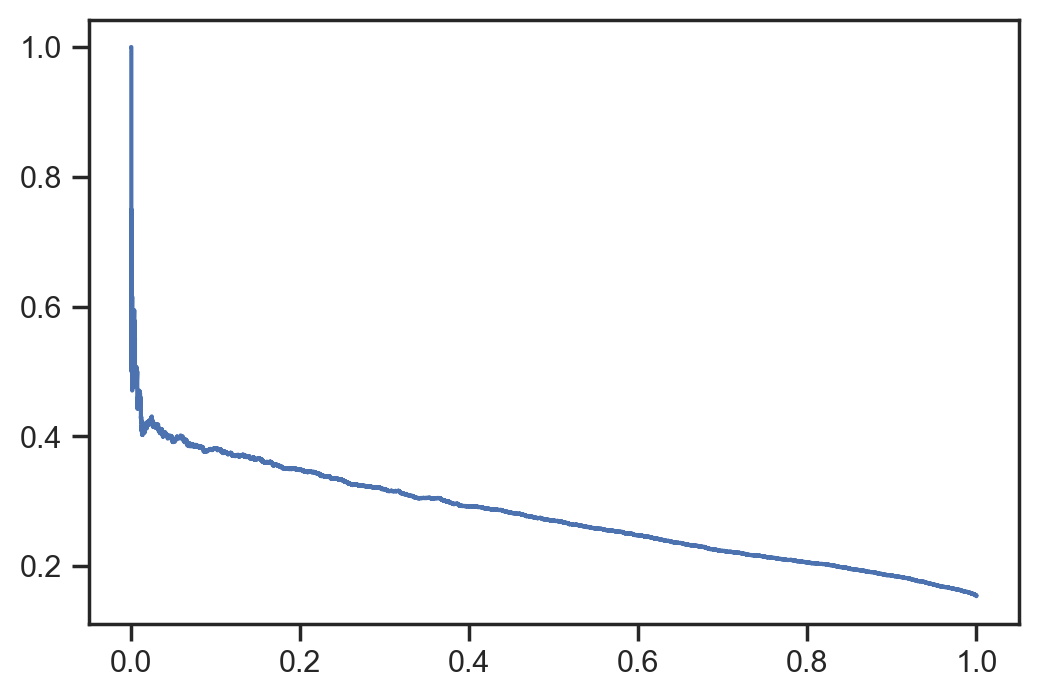

In [238]:
plt.plot(recall, precision)
plt.show()

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict, y_test)


array([[27445,  4320],
       [ 4704,  1549]])

In [104]:
from sklearn.metrics import log_loss
log_loss(y_test, clf.predict_proba(X_test))

0.5060599354522383

In [105]:
from sklearn.metrics import log_loss
log_loss(y_train, clf.predict_proba(X_train))

0.41453249502464684

In [48]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression(C=1000)
model.fit(X_train, y_train)

/Users/yancyliao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000)

In [51]:
model.predict(X_test).mean()

2.630333e-05

In [113]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152069 entries, 0 to 152072
Data columns (total 104 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    loan_amnt                            float32
 1    int_rate                             float32
 2    grade                                float32
 3    emp_length                           float32
 4    annual_inc                           float64
 5    dti                                  float32
 6    delinq_2yrs                          int32  
 7    open_acc                             int32  
 8    pub_rec                              int32  
 9    revol_bal                            float64
 10   revol_util                           float64
 11   total_acc                            float64
 12   total_rev_hi_lim                     float64
 13   bc_open_to_buy                       float64
 14   bc_util                              float64
 15   mo_sin_rcnt_rev

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [124]:
model = LogisticRegression(verbose=1, max_iter=10000,class_weight="balanced")
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.7s finished


LogisticRegression(class_weight='balanced', max_iter=10000, verbose=1)

In [130]:
from sklearn.metrics import roc_auc_score
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

scores = model.predict_proba(X_test)
roc_auc_score(y_test, scores[:,1])

0.6751988013594177

In [134]:
model = LogisticRegression(verbose=1, max_iter=1000)
model.fit(X_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


LogisticRegression(max_iter=1000, verbose=1)

In [135]:
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X_test)
model.predict(X_scaled2).mean()

0.0042085326

In [86]:
y_train.mean()

0.15406266

In [87]:
from sklearn.metrics import roc_auc_score
scores = model.predict_proba(X_test)
roc_auc_score(y_test, scores[:,1])

0.5003399361169367

In [102]:
X_scaled[:,37][:90]

array([-0.57391131,  1.74242951, -0.57391131, -0.57391131, -0.57391131,
        1.74242951, -0.57391131, -0.57391131, -0.57391131, -0.57391131,
        1.74242951, -0.57391131,  1.74242951, -0.57391131,  1.74242951,
       -0.57391131, -0.57391131, -0.57391131, -0.57391131,  1.74242951,
       -0.57391131, -0.57391131, -0.57391131, -0.57391131,  1.74242951,
       -0.57391131, -0.57391131, -0.57391131, -0.57391131, -0.57391131,
       -0.57391131, -0.57391131, -0.57391131, -0.57391131, -0.57391131,
        1.74242951, -0.57391131, -0.57391131, -0.57391131, -0.57391131,
       -0.57391131, -0.57391131,  1.74242951, -0.57391131, -0.57391131,
        1.74242951, -0.57391131,  1.74242951,  1.74242951, -0.57391131,
        1.74242951, -0.57391131, -0.57391131, -0.57391131, -0.57391131,
       -0.57391131, -0.57391131,  1.74242951, -0.57391131,  1.74242951,
       -0.57391131, -0.57391131,  1.74242951, -0.57391131, -0.57391131,
       -0.57391131,  1.74242951, -0.57391131,  1.74242951, -0.57

In [100]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114051 entries, 70659 to 82447
Data columns (total 104 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    loan_amnt                            float32
 1    int_rate                             float32
 2    grade                                float32
 3    emp_length                           float32
 4    annual_inc                           float64
 5    dti                                  float32
 6    delinq_2yrs                          int32  
 7    open_acc                             int32  
 8    pub_rec                              int32  
 9    revol_bal                            float64
 10   revol_util                           float64
 11   total_acc                            float64
 12   total_rev_hi_lim                     float64
 13   bc_open_to_buy                       float64
 14   bc_util                              float64
 15   mo_sin_rcnt_

In [159]:
X_trim = X[["int_rate"]]
X_train, X_test, y_train, y_test = train_test_split(X_trim, y)

In [175]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [176]:
y_pred = model.predict_proba(X_test)

In [177]:
roc_auc_score(y_test, y_pred[:,1])

0.6765474726591935

In [155]:
X_train[y_train==1]["grade"].mean()

4.5836086

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

test PR AUC: 0.5768451785996107
test Brier loss: 0.15369035719922142
test ROC AUC: 0.5
train PR AUC: 0.5771102401557198
train Brier loss: 0.15422048031143962
train ROC AUC: 0.5


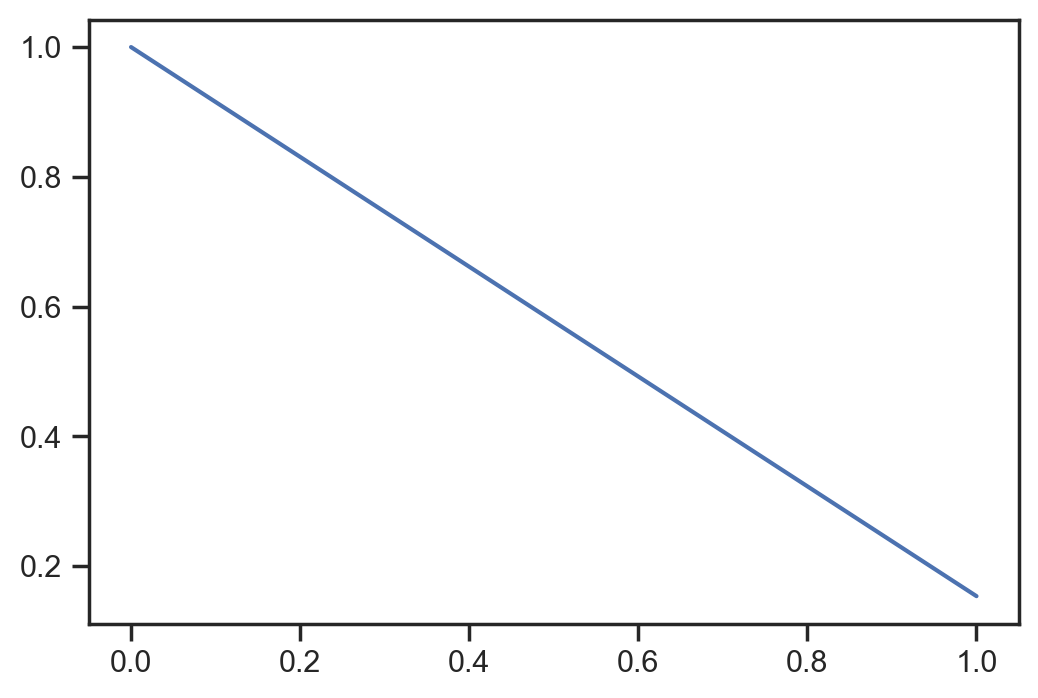

In [356]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
model1 = DummyClassifier(strategy="most_frequent")
model1.fit(X_train, y_train)

proba_test = model1.predict_proba(X_test)[:,1]
precision1_test, recall1_test, thresholds1_test = precision_recall_curve(y_test, proba_test)
print("test PR AUC: " + str(auc(recall1_test, precision1_test)))
print("test Brier loss: " + str(brier_score_loss(y_test,proba_test)))
print("test ROC AUC: " + str(roc_auc_score(y_test,proba_test)))

proba_train = model1.predict_proba(X_train)[:,1]
precision1_train, recall1_train, thresholds1_train = precision_recall_curve(y_train, proba_train)
print("train PR AUC: " + str(auc(recall1_train, precision1_train)))
print("train Brier loss: " + str(brier_score_loss(y_train,proba_train)))
print("train ROC AUC: " + str(roc_auc_score(y_train,proba_train)))

plt.plot(recall1_test, precision1_test)
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


test PR AUC: 0.291493956093664
test Brier loss: 0.12116484985729496
test ROC AUC: 0.6997230962317391
train PR AUC: 0.2889017248641351
train Brier loss: 0.12172452175031234
train ROC AUC: 0.6977139854360304


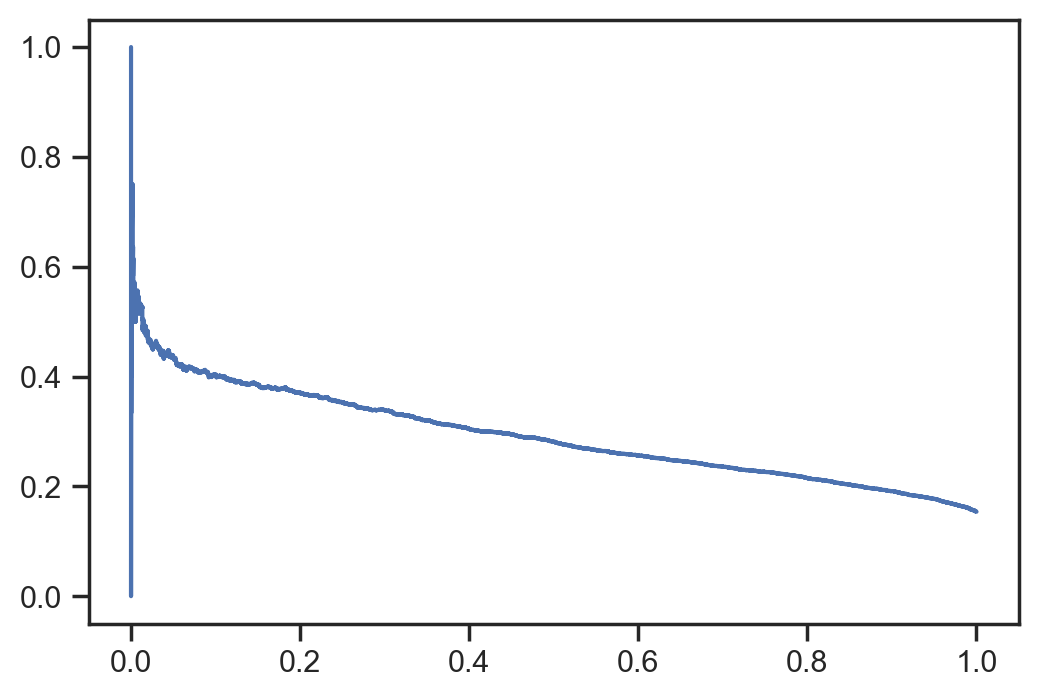

In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score

model2 = LogisticRegression(C=1, verbose=1, max_iter=1000)
model2.fit(X_train_scaled, y_train)

proba_test = model2.predict_proba(X_test_scaled)[:,1]
precision2_test, recall2_test, thresholds2_test = precision_recall_curve(y_test, proba_test)
print("test PR AUC: " + str(auc(recall2_test, precision2_test)))
print("test Brier loss: " + str(brier_score_loss(y_test,proba_test)))
print("test ROC AUC: " + str(roc_auc_score(y_test,proba_test)))

proba_train = model2.predict_proba(X_train_scaled)[:,1]
precision2_train, recall2_train, thresholds2_train = precision_recall_curve(y_train, proba_train)
print("train PR AUC: " + str(auc(recall2_train, precision2_train)))
print("train Brier loss: " + str(brier_score_loss(y_train,proba_train)))
print("train ROC AUC: " + str(roc_auc_score(y_train,proba_train)))

plt.plot(recall2_test, precision2_test)
plt.show()

test PR AUC: 0.2792890269497062
test Brier loss: 0.12284684963456478
test ROC AUC: 0.6888458566363752
train PR AUC: 0.294357265865867
train Brier loss: 0.12253286489503463
train ROC AUC: 0.6982513633212936


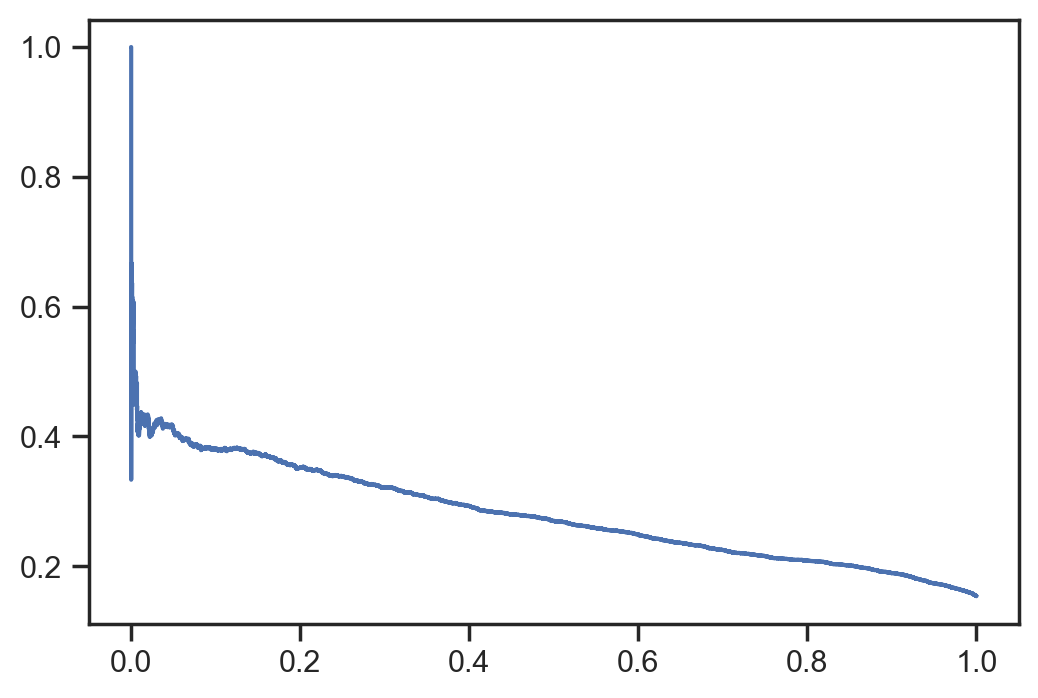

In [353]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=0, max_depth = 6, n_estimators = 20)
model3.fit(X_train,y_train)

proba_test = model3.predict_proba(X_test)[:,1]
precision3_test, recall3_test, thresholds3_test = precision_recall_curve(y_test, proba_test)
print("test PR AUC: " + str(auc(recall3_test, precision3_test)))
print("test Brier loss: " + str(brier_score_loss(y_test,proba_test)))
print("test ROC AUC: " + str(roc_auc_score(y_test,proba_test)))

proba_train = model3.predict_proba(X_train)[:,1]
precision3_train, recall3_train, thresholds3_train = precision_recall_curve(y_train, proba_train)
print("train PR AUC: " + str(auc(recall3_train, precision3_train)))
print("train Brier loss: " + str(brier_score_loss(y_train,proba_train)))
print("train ROC AUC: " + str(roc_auc_score(y_train,proba_train)))

plt.plot(recall3_test, precision3_test)
plt.show()

[16:32:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test PR AUC: 0.2800111538344757
test Brier loss: 0.13847830632735292
test ROC AUC: 0.6891371222194429
train PR AUC: 0.28851237919063816
train Brier loss: 0.1384046294352052
train ROC AUC: 0.6964494729788129


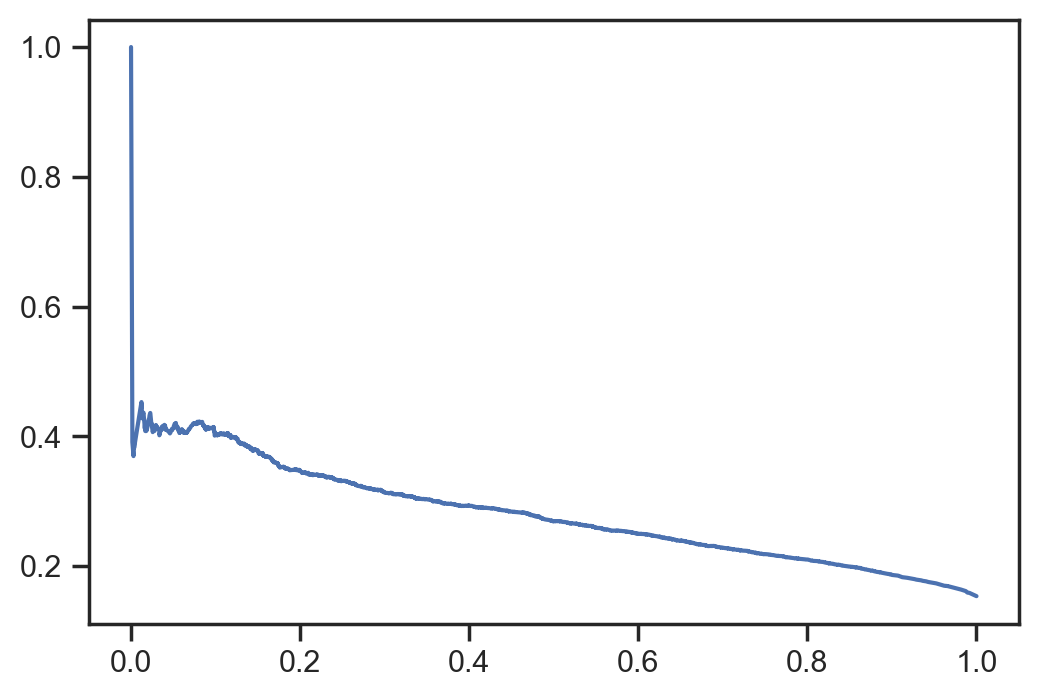

In [352]:
import xgboost as xgb
model4 = xgb.XGBClassifier(max_depth=5, eta=0.1, base_score=0.5, n_estimators =10, use_label_encoder=False)
model4.fit(X_train,y_train)

proba_test = model4.predict_proba(X_test)[:,1]
precision4_test, recall4_test, thresholds4_test = precision_recall_curve(y_test, proba_test)
print("test PR AUC: " + str(auc(recall4_test, precision4_test)))
print("test Brier loss: " + str(brier_score_loss(y_test,proba_test)))
print("test ROC AUC: " + str(roc_auc_score(y_test,proba_test)))

proba_train = model4.predict_proba(X_train)[:,1]
precision4_train, recall4_train, thresholds4_train = precision_recall_curve(y_train, proba_train)
print("train PR AUC: " + str(auc(recall4_train, precision4_train)))
print("train Brier loss: " + str(brier_score_loss(y_train,proba_train)))
print("train ROC AUC: " + str(roc_auc_score(y_train,proba_train)))

plt.plot(recall4_test, precision4_test)
plt.show()

In [277]:
recall

array([1., 0.])

In [331]:
recall3_test[-20:]

array([0.0015403 , 0.0015403 , 0.00136916, 0.00119801, 0.00102687,
       0.00102687, 0.00102687, 0.00102687, 0.00102687, 0.00085572,
       0.00068458, 0.00068458, 0.00051343, 0.00051343, 0.00051343,
       0.00034229, 0.00017114, 0.        , 0.        , 0.        ])

In [334]:
precision3_test[-100:]

array([0.37373737, 0.37755102, 0.37113402, 0.375     , 0.36842105,
       0.36170213, 0.3655914 , 0.36956522, 0.37362637, 0.37777778,
       0.37078652, 0.375     , 0.37931034, 0.38372093, 0.38823529,
       0.39285714, 0.38554217, 0.37804878, 0.38271605, 0.3875    ,
       0.37974684, 0.37179487, 0.37662338, 0.36842105, 0.37333333,
       0.37837838, 0.38356164, 0.38888889, 0.38028169, 0.38571429,
       0.39130435, 0.38235294, 0.3880597 , 0.37878788, 0.36923077,
       0.375     , 0.38095238, 0.38709677, 0.39344262, 0.4       ,
       0.38983051, 0.37931034, 0.38596491, 0.39285714, 0.4       ,
       0.40740741, 0.41509434, 0.40384615, 0.41176471, 0.4       ,
       0.3877551 , 0.39583333, 0.40425532, 0.39130435, 0.37777778,
       0.36363636, 0.34883721, 0.35714286, 0.36585366, 0.375     ,
       0.35897436, 0.36842105, 0.37837838, 0.36111111, 0.37142857,
       0.38235294, 0.39393939, 0.40625   , 0.41935484, 0.4       ,
       0.4137931 , 0.42857143, 0.44444444, 0.46153846, 0.48   

In [338]:
thresholds3_test[-100:]

array([0.39497775, 0.39502637, 0.39643768, 0.3964731 , 0.39724186,
       0.39748695, 0.39757036, 0.39776673, 0.39847622, 0.39863619,
       0.39881912, 0.39936563, 0.39946077, 0.3997139 , 0.40050287,
       0.40070837, 0.40078137, 0.40087933, 0.40108911, 0.40136872,
       0.40160209, 0.40203329, 0.40272836, 0.40283798, 0.40333251,
       0.40451618, 0.40489342, 0.40588646, 0.40622597, 0.40654221,
       0.40706083, 0.40718263, 0.40774216, 0.40959949, 0.40975574,
       0.41006237, 0.41014978, 0.4102847 , 0.41041481, 0.41053109,
       0.41074482, 0.4115322 , 0.41207468, 0.41246956, 0.41258887,
       0.41276492, 0.41307255, 0.41360123, 0.41402768, 0.41482558,
       0.4148983 , 0.41501538, 0.41582462, 0.41603589, 0.41606262,
       0.41697735, 0.41767457, 0.41847175, 0.41921549, 0.419231  ,
       0.4197935 , 0.42181113, 0.42200366, 0.42286118, 0.42371023,
       0.42388805, 0.42489049, 0.42620705, 0.42762525, 0.42865386,
       0.42972397, 0.429837  , 0.43040705, 0.43063314, 0.43135

In [345]:
np.sort(proba_test)[-3]

0.47823061120899124

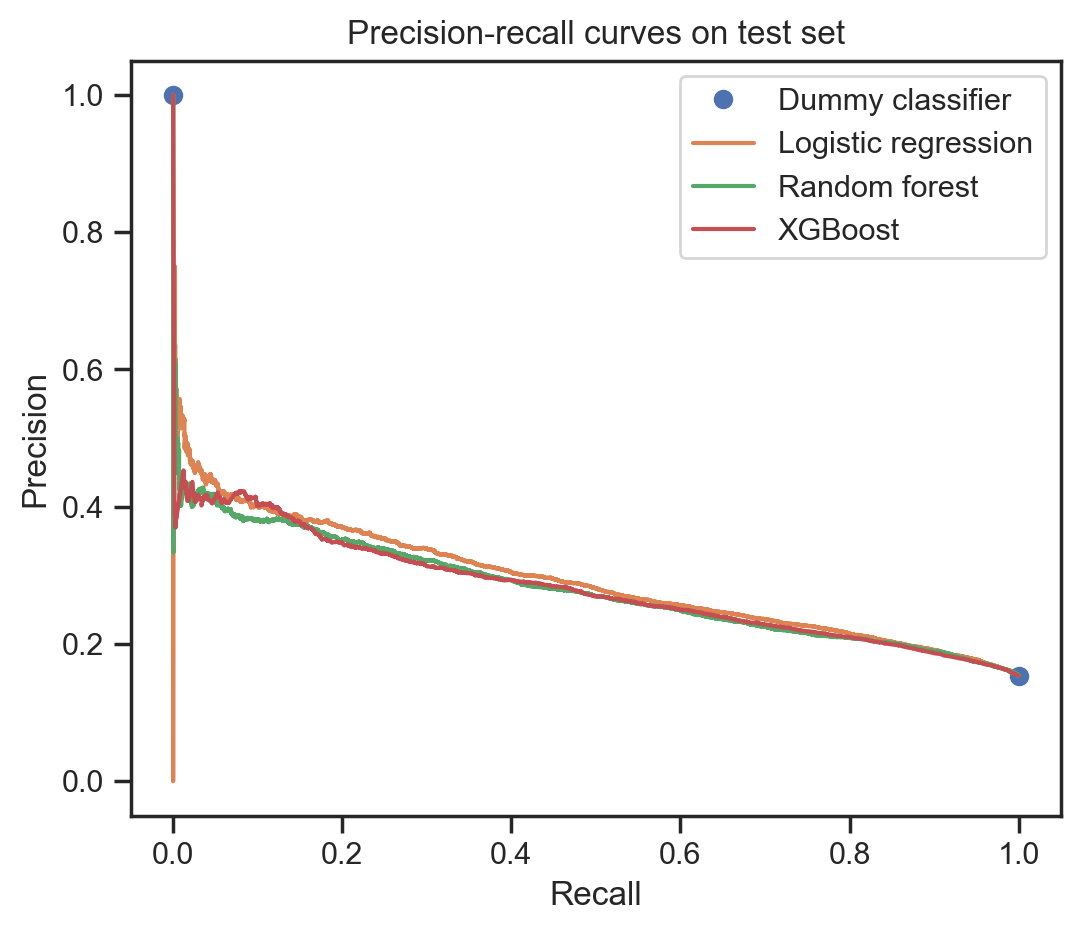

In [377]:
fig, ax = plt.subplots(figsize=(6,5), dpi=200)
ax.plot(recall1_test, precision1_test, 'o', label="Dummy classifier")
ax.plot(recall2_test, precision2_test, label="Logistic regression")
ax.plot(recall3_test, precision3_test, label="Random forest")
ax.plot(recall4_test, precision4_test, label="XGBoost")
ax.set_title("Precision-recall curves on test set")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.legend()

fig.savefig("../img/pr_curve.jpg")

<BarContainer object of 104 artists>

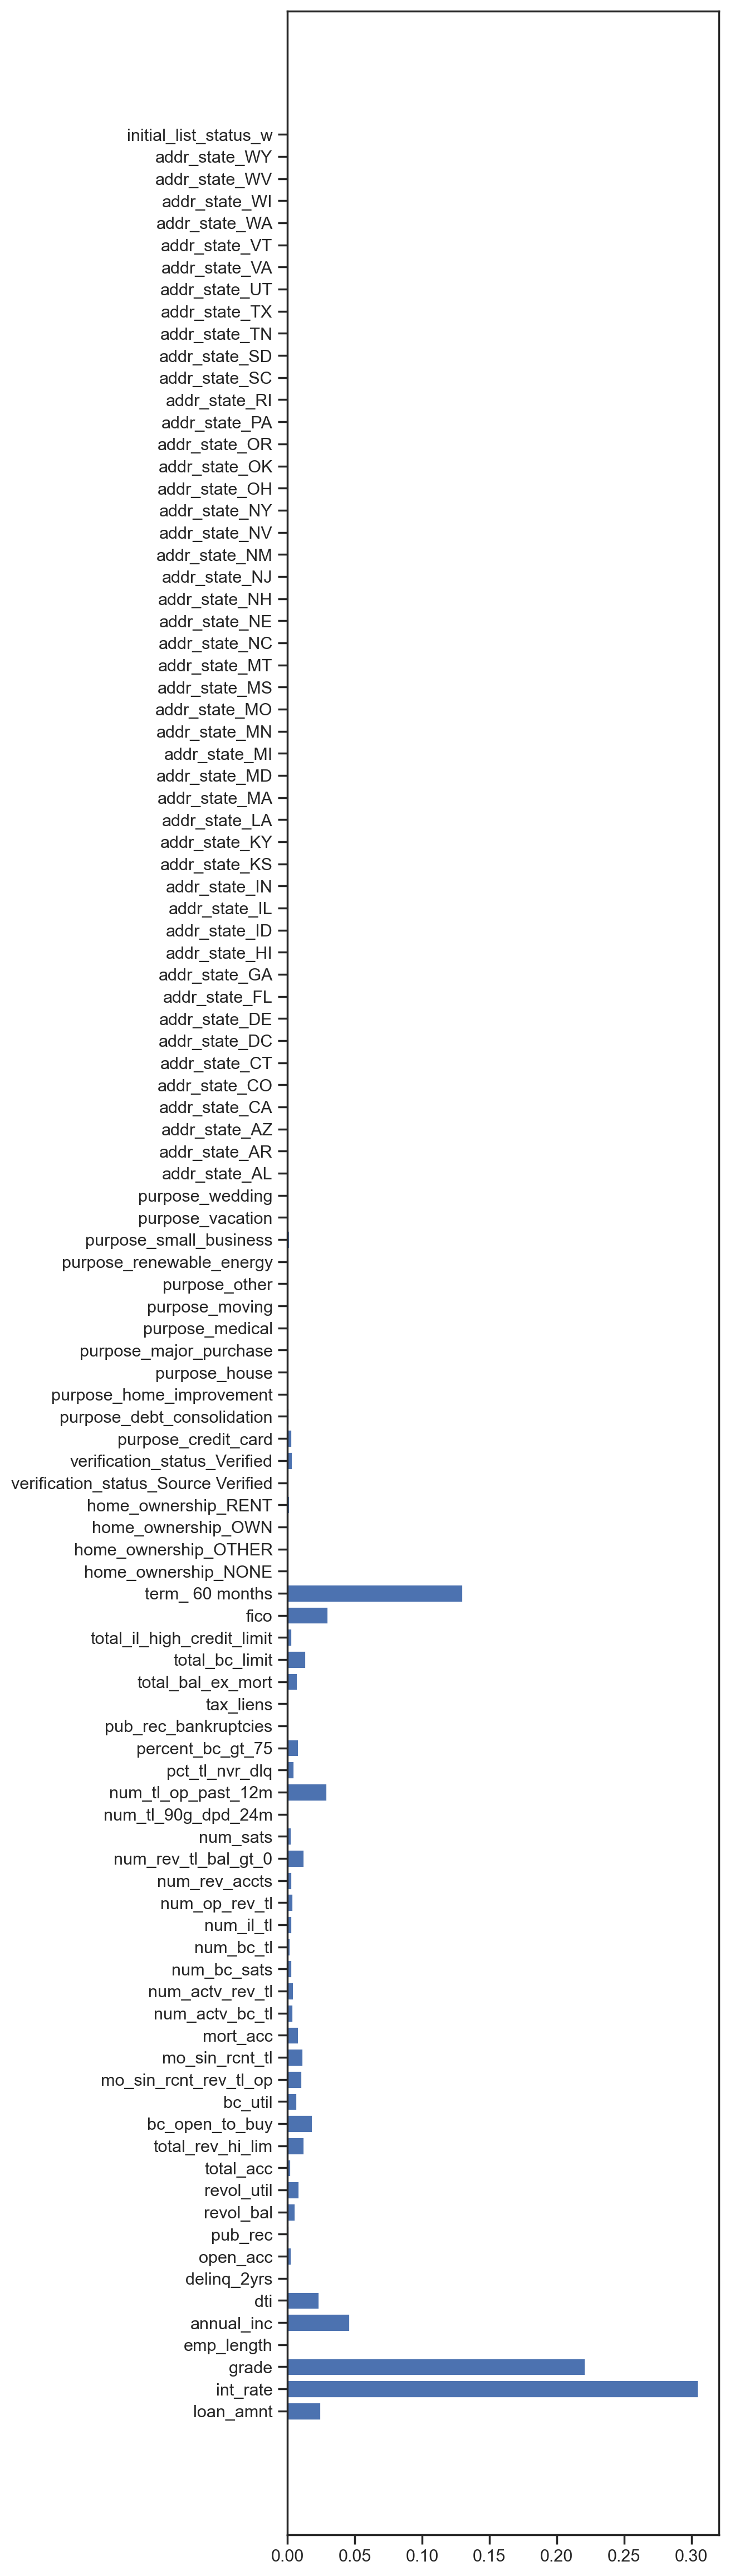

In [380]:
fig, ax = plt.subplots(figsize=(5, 30))
plt.barh(X_train.columns, model3.feature_importances_)